In [1]:
#Imports all needed packages 
from pathlib import Path
from datatree import DataTree
import dask
import xarray as xr
import pandas as pd
import valenspy as vp
import numpy as nps
from pathlib import Path
import geopandas as gpd
import rioxarray 
from valenspy.cf_checks import is_cf_compliant, cf_status

# Evaluation of the ALARO-0 Model for Water Cycle Analysis in Belgium

## Introduction

This notebook evaluates the performance of the ALARO-0 model in simulating the water cycle over Belgium. The ALARO-0 model is part of the ALADIN consortium and is developed for convection-permitting resolutions. The evaluation includes a comprehensive analysis of various water cycle components such as precipitation, evaporation, and runoff.

The study uses model outputs from the ALARO-0 model, observational data from the Royal Meteorological Institute of Belgium (RMI), and ERA5 reanalysis data. The evaluation involves spatial and temporal analyses, statistical evaluations, and identifying and analyzing extreme events.

### Data Description
- **Model Data**: ALARO-0 model outputs from three institutes (KULeuven, RMIB-UGent, and UCL) (1980-2010)
- **Observational Data**: Gridded observations from RMI (1954-2021)
- **Reanalysis Data**: ERA5 reanalysis data

### Study Area
- **Region**: Belgium

## Structure of the Notebook
1. Data Preparation
2. Spatial Analysis
3. Water Budget Components
4. Statistical Evaluation
5. Temporal Analysis
6. Extreme Events Analysis
7. Visualization and Presentation
8. Conclusion

## Data Preparation

In this section, we will import and preprocess the data from various sources. The data includes ERA5 reanalysis data, ALARO model data 3 from different institutes, and E-OBS data. The preprocessing steps involve cleaning the data and converting it to a common format.

### ERA5 Land Data
We import ERA5 land data and preprocess it by removing the 'time_bnds' variable and converting the data to CF conventions:

In [2]:
#import xarray as xr
#import geopandas as gpd

# Load ALARO-0 model data
#model_files = list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
#alaro_ds = xr.open_mfdataset(model_files, chunks="auto")

# Load observational data
#obs_ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")

# Load Belgian borders
# shapefile_path = "/home/kabruyn/fileserver/home/ValEnsPy/examples/Belgium_shapefile/be_1km.shp"
# belgium_gdf = gpd.read_file(shapefile_path)
#boundaries = "/mnt/HDS_CLIMATE/CLIMATE/nicghil/LandPrepSurfex/Shapefiles/"

In [2]:
import xarray as xr
from pathlib import Path

# Function to preprocess files and remove 'time_bnds'
def preprocess(ds):
    return ds.drop_vars('time_bnds', errors='ignore')

# Load ERA 5 land data with preprocessing to drop 'time_bnds'
era5_land_files = list(Path("/mnt/HDS_BREGILABEPOC/BREGILABEPOC/bertvs/era5-land/belgium/daily").rglob("*.nc"))
era5_land_ds = xr.open_mfdataset(era5_land_files, chunks="auto", preprocess=preprocess)

In [3]:
#Check if ERA5 data is ValEnsPy CF compliant
from valenspy.cf_checks import cf_status
cf_status(era5_land_ds)

The file is NOT ValEnsPy CF compliant.
0.00% of the variables are ValEnsPy CF compliant
Unknown to ValEnsPy: ['d2m', 'e', 'pev', 'ro', 'sde', 'sf', 'skt', 'slhf', 'sp', 'sro', 'sshf', 'ssr', 'ssrd', 'swvl1', 't2m', 'tp', 'u10', 'v10']


In [4]:
# Use the input convertor to make variables ValEnsPy CF compliant
from valenspy.inputconverter_functions import EOBS_to_CF, ERA5_to_CF, ERA5Land_to_CF
ic = vp.InputConverter(ERA5Land_to_CF)
era5_land_ds=ic.convert_input(era5_land_ds)

The file is NOT ValEnsPy CF compliant.
66.67% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['evspsbl', 'evspsblpot', 'mrro', 'prsn', 'ts', 'hfls', 'ps', 'mrros', 'hfss', 'rsds', 'tas', 'pr']
Unknown to ValEnsPy: ['d2m', 'sde', 'ssr', 'swvl1', 'u10', 'v10']


In [5]:
#Display ERA5 land data 
era5_land_ds

<xarray.Dataset> Size: 7GB
Dimensions:     (time: 52596, lon: 41, lat: 25)
Coordinates:
  * time        (time) datetime64[ns] 421kB 1950-01-01T11:00:00 ... 2021-12-3...
  * lon         (lon) float32 164B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat         (lat) float32 100B 52.0 51.88 51.75 51.62 ... 49.25 49.12 49.0
Data variables: (12/18)
    d2m         (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    evspsbl     (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    evspsblpot  (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    mrro        (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    sde         (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    prsn        (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    ...          ...
    rsds        (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    swvl1       (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    tas         (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    pr          (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    u10         (time, lat, lon) float32 216MB dask.array<chunksize=(731, 25, 41), meta=np.ndarray>
    v10         (time, lat, lon) float32 216MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Sep 05 05:06:06 2022: cdo -z zip daymin /mnt/HDS_BREGIL...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...
    dataset:      ERA5-Land
    freq:         hourly

# ALERO import from the 3 institutes

# ALARO Data from KULeuven
Next, we import and preprocess ALARO data from KULeuven. This involves removing specific files that cause errors during merging and are not needed for this evaluation:

In [5]:
import xarray as xr
from pathlib import Path

# Define the path to the KULeuven model data
kul_path = Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/CORDEX/CORDEX_belgium_day_eval_karian_latlon/be-04/KULeuven")

# Get a list of all NetCDF files in the directory and subdirectories
kul_model_files = list(kul_path.rglob("*.nc"))

# Initialize lists to store files with common dimensions and filtered out files
filtered_files = []
filtered_out_files = []

# Loop through each file and load its dataset to check dimensions and coordinates
for file in kul_model_files:
    ds = xr.open_dataset(file)
    # Extract dimensions (excluding coordinates)
    dimensions = set(ds.sizes.keys())
    # Check if the dimensions match the common dimensions (bnds, lat, lon, time, level)
    common_dims = {'bnds', 'lat', 'lon', 'time'}
    if dimensions.issuperset(common_dims):
        filtered_files.append(file)
    else:
        filtered_out_files.append(file)
    ds.close()  # Close the dataset to release resources

# print(f"Number of filtered NetCDF files: {len(filtered_files)}")
# print(f"Number of filtered out NetCDF files: {len(filtered_out_files)}")

# Print the list of filtered out files
# print("Filtered out files:")
# for file in filtered_out_files:
#    print(file)

# Attempt to open the dataset with mfdataset using the filtered files
kul_ds = xr.open_mfdataset(filtered_files, combine='by_coords', chunks='auto')

# Print dimensions and coordinates of the combined dataset
# print("Combined dataset dimensions:", kul_ds.dims)
# print("Combined dataset coordinates:", kul_ds.coords)

In [9]:
# Display the KULeuven dataset 
kul_ds

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 39447, lon: 41, lat: 25, bnds: 2, lev: 1, level: 1)
Coordinates:
  * time       (time) datetime64[ns] 316kB 1979-01-01T09:00:00 ... 2014-12-31...
  * lon        (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat        (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
  * lev        (lev) float64 8B 39.0
Dimensions without coordinates: bnds, level
Data variables: (12/20)
    time_bnds  (time, bnds) datetime64[ns] 631kB dask.array<chunksize=(1095, 2), meta=np.ndarray>
    cape       (time, lat, lon) float32 162MB dask.array<chunksize=(1097, 25, 41), meta=np.ndarray>
    clt        (time, lat, lon) float32 162MB dask.array<chunksize=(1097, 25, 41), meta=np.ndarray>
    huss       (time, lat, lon) float32 162MB dask.array<chunksize=(1096, 25, 41), meta=np.ndarray>
    pr         (time, lat, lon) float32 162MB dask.array<chunksize=(1097, 25, 41), meta=np.ndarray>
    prsn       (time, lat, lon) float32 162MB dask.array<chunksize=(1097, 25, 41), meta=np.ndarray>
    ...         ...
    tasmin     (time, lat, lon) float32 162MB dask.array<chunksize=(1096, 25, 41), meta=np.ndarray>
    ts         (time, lat, lon) float32 162MB dask.array<chunksize=(1096, 25, 41), meta=np.ndarray>
    uas        (time, lev, lat, lon) float32 162MB dask.array<chunksize=(1096, 1, 25, 41), meta=np.ndarray>
    vas        (time, lev, lat, lon) float32 162MB dask.array<chunksize=(1096, 1, 25, 41), meta=np.ndarray>
    zhd        (time, level, lat, lon) float32 162MB dask.array<chunksize=(1096, 1, 25, 41), meta=np.ndarray>
    zwd        (time, level, lat, lon) float32 162MB dask.array<chunksize=(1096, 1, 25, 41), meta=np.ndarray>
Attributes: (12/14)
    CDI:             Climate Data Interface version 1.9.9 (https://mpimet.mpg...
    Conventions:     CF-1.4
    title:           CORDEX.BE-0025
    project_id:      CORDEX.BE-0025
    experiment_id:   CORDEX.BE-URB2000
    realization:     1
    ...              ...
    references:      http://ees.kuleuven.be/geography/rcs/
    creation_date:   2015-10-03 03:15:50
    history:         Tue May 28 21:41:42 2024: cdo -z zip remap,/home/bertvs/...
    NCO:             "4.5.4"
    frequency:       day
    CDO:             Climate Data Operators version 1.9.9 (https://mpimet.mpg...

# Importing of RMIB_UGent

In [6]:
import xarray as xr
from pathlib import Path

# Define the path to the RMIB-UGent model data
rmib_path = Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/CORDEX/CORDEX_belgium_day_eval_karian_latlon/be-04/RMIB-UGent")

# Get a list of all NetCDF files in the directory and subdirectories
rmib_model_files = list(rmib_path.rglob("*.nc"))

# Initialize lists to store relevant and irrelevant files
relevant_files = []
irrelevant_files = []

# Loop through each file and load its dataset to check dimensions and coordinates
for file in rmib_model_files:
    try:
        ds = xr.open_dataset(file)
        # Extract dimensions (excluding coordinates)
        dimensions = set(ds.sizes.keys())
        # Check if the dimensions match the common dimensions (bnds, lat, lon, time)
        irrelevant_dims = {'dst_grid_rank', 'dst_grid_size', 'num_links', 'num_wgts', 'src_grid_rank', 'src_grid_size'}
        if dimensions.isdisjoint(irrelevant_dims):
            relevant_files.append(file)
        else:
            irrelevant_files.append(file)
        ds.close()  # Close the dataset to release resources
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        irrelevant_files.append(file)

# Print the number of relevant files
# print(f"Number of relevant NetCDF files: {len(relevant_files)}")
# print(f"Number of irrelevant NetCDF files: {len(irrelevant_files)}")

# Print the list of irrelevant files
# print("Irrelevant files:")
# for file in irrelevant_files:
#     print(file)

# Attempt to open the dataset with mfdataset using the relevant files, filtering out 'height', 'plev', and 'plev_bnds'
rmib_ds = xr.open_mfdataset(relevant_files, combine='by_coords', chunks='auto', drop_variables=['height', 'plev', 'plev_bnds'])

# Print dimensions and coordinates of the combined dataset
# print("Combined dataset dimensions:", rmib_ds.dims)
# print("Combined dataset coordinates:", rmib_ds.coords)



In [7]:
# Display the RMIB dataset 
rmib_ds

<xarray.Dataset> Size: 2GB
Dimensions:     (time: 11688, bnds: 2, lat: 25, lon: 41)
Coordinates:
  * time        (time) datetime64[ns] 94kB 1979-01-01T12:00:00 ... 2010-12-31...
  * lon         (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat         (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
Dimensions without coordinates: bnds
Data variables: (12/47)
    time_bnds   (time, bnds) datetime64[ns] 187kB dask.array<chunksize=(365, 2), meta=np.ndarray>
    clh         (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    clivi       (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    cll         (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    clm         (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    clt         (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    ...          ...
    tauv        (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    ts          (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    uas         (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    vas         (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    wsgsmax     (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    zmla        (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
Attributes: (12/26)
    CDI:                            Climate Data Interface version 1.9.9 (htt...
    institution:                    Royal Meteorological Institute of Belgium...
    Conventions:                    CF-1.6
    institute_id:                   RMIB-UGent
    model_id:                       RMIB-UGent-ALARO-0
    experiment_id:                  evaluation
    ...                             ...
    creation_date:                  2017-01-05T15:00:14Z
    tracking_id:                    32498d3e-4587-4282-92a5-7253bf41af11
    driving_experiment:             ECMWF-ERAINT, ERAINT, r1i1p1
    CORDEX_domain:                  be-04
    history:                        Tue May 28 21:58:19 2024: cdo -z zip rema...
    CDO:                            Climate Data Operators version 1.9.9 (htt...

# Importing of UCL data

In [7]:
import xarray as xr
from pathlib import Path

# Define the path to the UCL model data
ucl_path = Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/CORDEX/CORDEX_belgium_day_eval_karian_latlon/be-04/UCL")

# Get a list of all NetCDF files in the directory and subdirectories
ucl_model_files = list(ucl_path.rglob("*.nc"))

# Initialize lists to store files with common dimensions and filtered out files
filtered_files = []
filtered_out_files = []

# Loop through each file and load its dataset to check dimensions and coordinates
for file in ucl_model_files:
    try:
        ds = xr.open_dataset(file)
        # Extract dimensions (excluding coordinates)
        dimensions = set(ds.sizes.keys())
        # Check if the dimensions match the common dimensions (bnds, lat, lon, time)
        common_dims = {'bnds', 'lat', 'lon', 'time'}
        if dimensions.issuperset(common_dims):
            filtered_files.append(file)
        else:
            filtered_out_files.append(file)
        ds.close()  # Close the dataset to release resources
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        filtered_out_files.append(file)

# Print the number of filtered files
# print(f"Number of filtered NetCDF files: {len(filtered_files)}")
# print(f"Number of filtered out NetCDF files: {len(filtered_out_files)}")

# Print the list of filtered out files
# print("Filtered out files:")
# for file in filtered_out_files:
#     print(file)

# Attempt to open the dataset with mfdataset using the filtered files, filtering out 'time_bnds'
ucl_ds = xr.open_mfdataset(filtered_files, combine='by_coords', chunks='auto', drop_variables=['time_bnds'])

# Print dimensions and coordinates of the combined dataset
# print("Combined dataset dimensions:", ucl_ds.dims)
# print("Combined dataset coordinates:", ucl_ds.coords)


In [9]:
# Display the UCL data 
ucl_ds

<xarray.Dataset> Size: 9GB
Dimensions:     (time: 56584, lon: 41, lat: 25, soil1: 10, bnds: 2)
Coordinates:
  * time        (time) datetime64[ns] 453kB 1980-01-01 ... 2010-12-31T11:30:00
  * lon         (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat         (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
    height_2m   float32 4B 2.0
  * soil1       (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 2.86 5.74 11.5
    height_10m  float32 4B 10.0
Dimensions without coordinates: bnds
Data variables: (12/32)
    RAIN_GSP    (time, lat, lon) float32 232MB dask.array<chunksize=(3659, 25, 41), meta=np.ndarray>
    cape        (time, lat, lon) float32 232MB dask.array<chunksize=(1834, 25, 41), meta=np.ndarray>
    clt         (time, lat, lon) float32 232MB dask.array<chunksize=(1834, 25, 41), meta=np.ndarray>
    dewT        (time, lat, lon) float32 232MB dask.array<chunksize=(1833, 25, 41), meta=np.ndarray>
    evspsbl     (time, lat, lon) float32 232MB dask.array<chunksize=(1831, 25, 41), meta=np.ndarray>
    hffs        (time, lat, lon) float32 232MB dask.array<chunksize=(1833, 25, 41), meta=np.ndarray>
    ...          ...
    tasmin      (time, lat, lon) float32 232MB dask.array<chunksize=(1830, 25, 41), meta=np.ndarray>
    ts          (time, lat, lon) float32 232MB dask.array<chunksize=(1833, 25, 41), meta=np.ndarray>
    uas         (time, lat, lon) float32 232MB dask.array<chunksize=(1833, 25, 41), meta=np.ndarray>
    vas         (time, lat, lon) float32 232MB dask.array<chunksize=(1833, 25, 41), meta=np.ndarray>
    wsgsmax     (time, lat, lon) float32 232MB dask.array<chunksize=(1830, 25, 41), meta=np.ndarray>
    zmla        (time, lat, lon) float32 232MB dask.array<chunksize=(1832, 25, 41), meta=np.ndarray>
Attributes: (12/15)
    CDI:             Climate Data Interface version 1.9.9 (https://mpimet.mpg...
    source:          cosmo_131108_5.00_clm1, int2lm_131101_2.00_clm1
    institution:     Université Catholique de Louvain
    Conventions:     CF-1.4
    title:           EUROCORDEX-011
    project_id:      CORDEX.BE-0025
    ...              ...
    contact:         Cecille Villanueva (cecille.villanueva@uclouvain.be)
    references:      http://www.clm-community.eu/
    creation_date:   2016-09-14 07:26:44
    history:         Tue May 28 22:16:03 2024: cdo -z zip remap,/home/bertvs/...
    frequency:       day
    CDO:             Climate Data Operators version 1.9.9 (https://mpimet.mpg...

## Import eobs data 

In [8]:
# Load EOBS model data
model_files = list(Path("/mnt/HDS_URCLIM/URCLIM/obs/gridded/domain/belgium/pr/eobs/v29.0e_0.1deg_ens_mean/day/per_yr").rglob("*.nc"))
eobs_pr_ds = xr.open_mfdataset(model_files, chunks="auto")

# Load EOBS model data
model_files = list(Path("/mnt/HDS_URCLIM/URCLIM/obs/gridded/domain/belgium/tas/eobs/v29.0e_0.1deg_ens_mean/day/per_yr").rglob("*.nc"))
eobs_tas_ds = xr.open_mfdataset(model_files, chunks="auto")

In [11]:
eobs_tas_ds

<xarray.Dataset> Size: 111MB
Dimensions:  (time: 27028, lat: 25, lon: 41)
Coordinates:
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
  * lon      (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat      (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
Data variables:
    tg       (time, lat, lon) float32 111MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 1.9.9 (https://mpimet.mpg....
    Conventions:    CF-1.4
    history:        Tue Jun 11 11:42:02 2024: cdo remap,/mnt/netapp/home/bert...
    E-OBS_version:  29.0e
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....
    CDO:            Climate Data Operators version 1.9.9 (https://mpimet.mpg....

In [12]:
eobs_pr_ds

<xarray.Dataset> Size: 111MB
Dimensions:  (time: 27028, lat: 25, lon: 41)
Coordinates:
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
  * lon      (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat      (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
Data variables:
    pp       (time, lat, lon) float32 111MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Jun 11 11:52:02 2024: cdo remap,/mnt/netapp/home/bertvs...
    NCO:          netCDF Operators version 5.1.4 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...

The following code selects part of code selects the parameters that are relevant for water budget analysis

In [11]:
# Function to select relevant variables based on availability
def select_relevant_variables(dataset, variable_names):
    available_vars = [var for var in variable_names if var in dataset.data_vars]
    return dataset[available_vars]

# Define the relevant variables for each dataset
era5_vars = ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']
rmib_vars = ['pr', 'evspsbl', 'mrros', 'mrro', 'mrso']
kul_vars = ['pr', 'evspsbl', 'mrros', 'mrro', 'prw'] 
ucl_vars = ['pr', 'evspsbl', 'mrros', 'mrro', 'mrso']
eobs_pr_vars = ['pp'] 
eobs_tas_vars = ['tg']  

# Extract relevant parameters for each dataset
era5_land_wba = select_relevant_variables(era5_land_ds, era5_vars)
rmib_wba = select_relevant_variables(rmib_ds, rmib_vars)
kul_wba = select_relevant_variables(kul_ds, kul_vars)
ucl_wba = select_relevant_variables(ucl_ds, ucl_vars)
eobs_pr_wba = select_relevant_variables(eobs_pr_ds, eobs_pr_vars)
eobs_tas_wba = select_relevant_variables(eobs_tas_ds, eobs_tas_vars)

# Combine EOBS datasets
eobs_combined_params = xr.merge([eobs_pr_params, eobs_tas_params])

# Print the extracted parameters to verify
print("ERA5 Parameters:", list(era5_params.data_vars))
print("RMIB Parameters:", list(rmib_params.data_vars))
print("KULeuven Parameters:", list(kul_params.data_vars))
print("UCL Parameters:", list(ucl_params.data_vars))
print("EOBS Combined Parameters:", list(eobs_combined_params.data_vars))


ERA5 Parameters: ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']
RMIB Parameters: ['pr', 'evspsbl', 'mrros', 'mrro', 'mrso']
KULeuven Parameters: ['pr', 'prw']
UCL Parameters: ['pr', 'evspsbl', 'mrros', 'mrro', 'mrso']
EOBS Combined Parameters: ['pp', 'tg']


In [12]:
era5_land_wba

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 52596, lat: 25, lon: 41)
Coordinates:
  * time     (time) datetime64[ns] 421kB 1950-01-01T11:00:00 ... 2021-12-31T1...
  * lon      (lon) float32 164B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat      (lat) float32 100B 52.0 51.88 51.75 51.62 ... 49.25 49.12 49.0
Data variables:
    pr       (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    evspsbl  (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    mrros    (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    mrro     (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
    swvl1    (time, lat, lon) float64 431MB dask.array<chunksize=(730, 25, 41), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Sep 05 05:06:06 2022: cdo -z zip daymin /mnt/HDS_BREGIL...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...
    dataset:      ERA5-Land
    freq:         hourly

In [13]:
rmib_wba

<xarray.Dataset> Size: 240MB
Dimensions:  (time: 11688, lat: 25, lon: 41)
Coordinates:
  * time     (time) datetime64[ns] 94kB 1979-01-01T12:00:00 ... 2010-12-31T12...
  * lon      (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat      (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
Data variables:
    pr       (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    evspsbl  (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    mrros    (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    mrro     (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    mrso     (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
Attributes: (12/26)
    CDI:                            Climate Data Interface version 1.9.9 (htt...
    institution:                    Royal Meteorological Institute of Belgium...
    Conventions:                    CF-1.6
    institute_id:                   RMIB-UGent
    model_id:                       RMIB-UGent-ALARO-0
    experiment_id:                  evaluation
    ...                             ...
    creation_date:                  2017-01-05T15:00:14Z
    tracking_id:                    32498d3e-4587-4282-92a5-7253bf41af11
    driving_experiment:             ECMWF-ERAINT, ERAINT, r1i1p1
    CORDEX_domain:                  be-04
    history:                        Tue May 28 21:58:19 2024: cdo -z zip rema...
    CDO:                            Climate Data Operators version 1.9.9 (htt...

In [14]:
kul_wba

<xarray.Dataset> Size: 324MB
Dimensions:  (time: 39447, lat: 25, lon: 41)
Coordinates:
  * time     (time) datetime64[ns] 316kB 1979-01-01T09:00:00 ... 2014-12-31T1...
  * lon      (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat      (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
Data variables:
    pr       (time, lat, lon) float32 162MB dask.array<chunksize=(1097, 25, 41), meta=np.ndarray>
    prw      (time, lat, lon) float32 162MB dask.array<chunksize=(1097, 25, 41), meta=np.ndarray>
Attributes: (12/14)
    CDI:             Climate Data Interface version 1.9.9 (https://mpimet.mpg...
    Conventions:     CF-1.4
    title:           CORDEX.BE-0025
    project_id:      CORDEX.BE-0025
    experiment_id:   CORDEX.BE-URB2000
    realization:     1
    ...              ...
    references:      http://ees.kuleuven.be/geography/rcs/
    creation_date:   2015-10-03 03:15:50
    history:         Tue May 28 21:41:42 2024: cdo -z zip remap,/home/bertvs/...
    NCO:             "4.5.4"
    frequency:       day
    CDO:             Climate Data Operators version 1.9.9 (https://mpimet.mpg...

In [15]:
ucl_wba

<xarray.Dataset> Size: 3GB
Dimensions:     (time: 56584, lat: 25, lon: 41, soil1: 10)
Coordinates:
  * time        (time) datetime64[ns] 453kB 1980-01-01 ... 2010-12-31T11:30:00
  * lon         (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat         (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
    height_2m   float32 4B 2.0
  * soil1       (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 2.86 5.74 11.5
    height_10m  float32 4B 10.0
Data variables:
    pr          (time, lat, lon) float32 232MB dask.array<chunksize=(1834, 25, 41), meta=np.ndarray>
    evspsbl     (time, lat, lon) float32 232MB dask.array<chunksize=(1831, 25, 41), meta=np.ndarray>
    mrros       (time, lat, lon) float32 232MB dask.array<chunksize=(1831, 25, 41), meta=np.ndarray>
    mrro        (time, lat, lon) float32 232MB dask.array<chunksize=(1831, 25, 41), meta=np.ndarray>
    mrso        (time, soil1, lat, lon) float32 2GB dask.array<chunksize=(1832, 10, 25, 41), meta=np.ndarray>
Attributes: (12/15)
    CDI:             Climate Data Interface version 1.9.9 (https://mpimet.mpg...
    source:          cosmo_131108_5.00_clm1, int2lm_131101_2.00_clm1
    institution:     Université Catholique de Louvain
    Conventions:     CF-1.4
    title:           EUROCORDEX-011
    project_id:      CORDEX.BE-0025
    ...              ...
    contact:         Cecille Villanueva (cecille.villanueva@uclouvain.be)
    references:      http://www.clm-community.eu/
    creation_date:   2016-09-14 07:26:44
    history:         Tue May 28 22:16:03 2024: cdo -z zip remap,/home/bertvs/...
    frequency:       day
    CDO:             Climate Data Operators version 1.9.9 (https://mpimet.mpg...

In [33]:
eobs_combined_params

<xarray.Dataset> Size: 222MB
Dimensions:  (time: 27028, lat: 25, lon: 41)
Coordinates:
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
  * lon      (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat      (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
Data variables:
    pp       (time, lat, lon) float32 111MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    tg       (time, lat, lon) float32 111MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Jun 11 11:52:02 2024: cdo remap,/mnt/netapp/home/bertvs...
    NCO:          netCDF Operators version 5.1.4 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...

The units of the dataset should be the same as ERA5land.

mrso: Total Soil Moisture Content (to compare with swvl1 in ERA5) (cubic meters per cubic meter)

In [13]:
# Convert mrso from kg/m² to m³/m³
if 'mrso' in rmib_aligned.data_vars:
    rmib_aligned['swvl1'] = rmib_aligned['mrso'] / 1000
    rmib_aligned['swvl1'].attrs['units'] = 'm³/m³'
    rmib_aligned['swvl1'].attrs['long_name'] = 'Volumetric soil water layer 1 (converted from mrso)'

# Verify the conversion
print(f"Units of 'swvl1' in RMIB after conversion: {rmib_aligned['swvl1'].attrs['units']}")


Units of 'swvl1' in RMIB after conversion: m³/m³


In [38]:
rmib_aligned

<xarray.Dataset> Size: 288MB
Dimensions:  (time: 11688, lat: 25, lon: 41)
Coordinates:
  * time     (time) datetime64[ns] 94kB 1979-01-01T12:00:00 ... 2010-12-31T12...
  * lon      (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat      (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
Data variables:
    pr       (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    evspsbl  (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    mrros    (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    mrro     (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    mrso     (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
    swvl1    (time, lat, lon) float32 48MB dask.array<chunksize=(365, 25, 41), meta=np.ndarray>
Attributes: (12/26)
    CDI:                            Climate Data Interface version 1.9.9 (htt...
    institution:                    Royal Meteorological Institute of Belgium...
    Conventions:                    CF-1.6
    institute_id:                   RMIB-UGent
    model_id:                       RMIB-UGent-ALARO-0
    experiment_id:                  evaluation
    ...                             ...
    creation_date:                  2017-01-05T15:00:14Z
    tracking_id:                    32498d3e-4587-4282-92a5-7253bf41af11
    driving_experiment:             ECMWF-ERAINT, ERAINT, r1i1p1
    CORDEX_domain:                  be-04
    history:                        Tue May 28 21:58:19 2024: cdo -z zip rema...
    CDO:                            Climate Data Operators version 1.9.9 (htt...

In [14]:
# Convert mrso from kg/m² to m³/m³ for UCL dataset
if 'mrso' in ucl_aligned.data_vars:
    ucl_aligned['swvl1'] = ucl_aligned['mrso'] / 1000
    ucl_aligned['swvl1'].attrs['units'] = 'm³/m³'
    ucl_aligned['swvl1'].attrs['long_name'] = 'Volumetric soil water layer 1 (converted from mrso)'

# Verify the conversion
print(f"Units of 'swvl1' in UCL after conversion: {ucl_aligned['swvl1'].attrs['units']}")


Units of 'swvl1' in UCL after conversion: m³/m³


In [41]:
ucl_aligned

<xarray.Dataset> Size: 6GB
Dimensions:     (time: 56584, lat: 25, lon: 41, soil1: 10)
Coordinates:
  * time        (time) datetime64[ns] 453kB 1980-01-01 ... 2010-12-31T11:30:00
  * lon         (lon) float64 328B 2.0 2.125 2.25 2.375 ... 6.625 6.75 6.875 7.0
  * lat         (lat) float64 200B 49.0 49.12 49.25 49.38 ... 51.75 51.88 52.0
    height_2m   float32 4B 2.0
  * soil1       (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 2.86 5.74 11.5
    height_10m  float32 4B 10.0
Data variables:
    pr          (time, lat, lon) float32 232MB dask.array<chunksize=(1834, 25, 41), meta=np.ndarray>
    evspsbl     (time, lat, lon) float32 232MB dask.array<chunksize=(1831, 25, 41), meta=np.ndarray>
    mrros       (time, lat, lon) float32 232MB dask.array<chunksize=(1831, 25, 41), meta=np.ndarray>
    mrro        (time, lat, lon) float32 232MB dask.array<chunksize=(1831, 25, 41), meta=np.ndarray>
    mrso        (time, soil1, lat, lon) float32 2GB dask.array<chunksize=(1832, 10, 25, 41), meta=np.ndarray>
    swvl1       (time, soil1, lat, lon) float32 2GB dask.array<chunksize=(1832, 10, 25, 41), meta=np.ndarray>
Attributes: (12/15)
    CDI:             Climate Data Interface version 1.9.9 (https://mpimet.mpg...
    source:          cosmo_131108_5.00_clm1, int2lm_131101_2.00_clm1
    institution:     Université Catholique de Louvain
    Conventions:     CF-1.4
    title:           EUROCORDEX-011
    project_id:      CORDEX.BE-0025
    ...              ...
    contact:         Cecille Villanueva (cecille.villanueva@uclouvain.be)
    references:      http://www.clm-community.eu/
    creation_date:   2016-09-14 07:26:44
    history:         Tue May 28 22:16:03 2024: cdo -z zip remap,/home/bertvs/...
    frequency:       day
    CDO:             Climate Data Operators version 1.9.9 (https://mpimet.mpg...

## Below is what I want to discuss during the meeting 

In [21]:
import xarray as xr
import pandas as pd

# Define the year for analysiss
year = '2010'

# Extract the relevant variables and subset the year of interest
era5_land_wba = era5_land_ds[['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']].sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
rmib_wba = rmib_ds[['pr', 'evspsbl', 'mrros', 'mrro', 'mrso']].sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
kul_wba = kul_ds[['pr']].sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
ucl_wba = ucl_ds[['pr', 'evspsbl', 'mrros', 'mrro', 'mrso']].sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

# Convert to DataFrame for easier manipulation
era5_land_df = era5_land_wba.to_dataframe().reset_index()
rmib_df = rmib_wba.to_dataframe().reset_index()
kul_df = kul_wba.to_dataframe().reset_index()
ucl_df = ucl_wba.to_dataframe().reset_index()

# Ensure 'time' is set as index for resampling
era5_land_df.set_index('time', inplace=True)
rmib_df.set_index('time', inplace=True)
kul_df.set_index('time', inplace=True)
ucl_df.set_index('time', inplace=True)

# Resample to monthly averages
era5_land_monthly = era5_land_df.resample('ME').mean()
rmib_monthly = rmib_df.resample('ME').mean()
kul_monthly = kul_df.resample('ME').mean()
ucl_monthly = ucl_df.resample('ME').mean()

# Combine into a single DataFrame for comparison
# For precipitation
precipitation_comparison = pd.concat([era5_land_monthly[['pr']], kul_monthly[['pr']], rmib_monthly[['pr']], ucl_monthly[['pr']]],
                                     keys=['ERA5', 'KULeuven', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
precipitation_comparison.columns = precipitation_comparison.columns.droplevel(1)

# For evaporation
evaporation_comparison = pd.concat([era5_land_monthly[['evspsbl']], rmib_monthly[['evspsbl']], ucl_monthly[['evspsbl']]],
                                   keys=['ERA5', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
evaporation_comparison.columns = evaporation_comparison.columns.droplevel(1)

# For surface runoff
surface_runoff_comparison = pd.concat([era5_land_monthly[['mrros']], rmib_monthly[['mrros']], ucl_monthly[['mrros']]],
                                     keys=['ERA5', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
surface_runoff_comparison.columns = surface_runoff_comparison.columns.droplevel(1)

# For total runoff
total_runoff_comparison = pd.concat([era5_land_monthly[['mrro']], rmib_monthly[['mrro']], ucl_monthly[['mrro']]],
                                   keys=['ERA5', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
total_runoff_comparison.columns = total_runoff_comparison.columns.droplevel(1)

# For soil moisture
soil_moisture_comparison = pd.concat([era5_land_monthly[['swvl1']], rmib_monthly[['mrso']], ucl_monthly[['mrso']]],
                                    keys=['ERA5', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
soil_moisture_comparison.columns = soil_moisture_comparison.columns.droplevel(1)

# Display the results
print("Precipitation Comparison:")
print(precipitation_comparison)
print("\nEvaporation Comparison:")
print(evaporation_comparison)
print("\nSurface Runoff Comparison:")
print(surface_runoff_comparison)
print("\nTotal Runoff Comparison:")
print(total_runoff_comparison)
print("\nSoil Moisture Comparison:")
print(soil_moisture_comparison)


Precipitation Comparison:
Dataset             ERA5  KULeuven      RMIB           UCL
time                                                      
2010-01-31  5.229483e-07  0.000031  0.000020  2.005673e-05
2010-02-28  9.348285e-07  0.000045  0.000039  3.238079e-05
2010-03-31  1.953891e-07  0.000020  0.000040  1.520359e-05
2010-04-30  1.133281e-08  0.000013  0.000037  8.883607e-06
2010-05-31  5.049071e-07  0.000023  0.000030  1.988910e-05
2010-06-30  8.508168e-08  0.000023  0.000031  1.388107e-05
2010-07-31  2.065054e-08  0.000018  0.000032  1.592095e-05
2010-08-31  1.463770e-06  0.000043  0.000025  2.231630e-05
2010-09-30  4.313573e-07  0.000020  0.000029  1.709054e-05
2010-10-31  2.036642e-07  0.000024  0.000027  1.617237e-05
2010-11-30  2.199781e-06  0.000050  0.000040  4.026739e-05
2010-12-31  1.177835e-06  0.000035  0.000030  4.583923e-08

Evaporation Comparison:
Dataset         ERA5      RMIB       UCL
time                                    
2010-01-31 -0.000011  0.000005  0.000004


In [23]:
precipitation_stats = precipitation_comparison.describe()
evaporation_stats = evaporation_comparison.describe()
surface_runoff_stats = surface_runoff_comparison.describe()
total_runoff_stats = total_runoff_comparison.describe()
soil_moisture_stats = soil_moisture_comparison.describe()

print("Precipitation Statistics:")
print(precipitation_stats)
print("\nEvaporation Statistics:")
print(evaporation_stats)
print("\nSurface Runoff Statistics:")
print(surface_runoff_stats)
print("\nTotal Runoff Statistics:")
print(total_runoff_stats)
print("\nSoil Moisture Statistics:")
print(soil_moisture_stats)

Precipitation Statistics:
Dataset          ERA5   KULeuven       RMIB           UCL
count    1.200000e+01  12.000000  12.000000  1.200000e+01
mean     6.459621e-07   0.000029   0.000032  1.850902e-05
std      6.767286e-07   0.000012   0.000006  1.028989e-05
min      1.133281e-08   0.000013   0.000020  4.583923e-08
25%      1.678123e-07   0.000020   0.000029  1.487296e-05
50%      4.681322e-07   0.000024   0.000031  1.663145e-05
75%      9.955801e-07   0.000037   0.000038  2.062162e-05
max      2.199781e-06   0.000050   0.000040  4.026739e-05

Evaporation Statistics:
Dataset       ERA5       RMIB        UCL
count    12.000000  12.000000  12.000000
mean     -0.000059   0.000021   0.000012
std       0.000037   0.000014   0.000009
min      -0.000111   0.000005   0.000003
25%      -0.000088   0.000009   0.000005
50%      -0.000061   0.000019   0.000010
75%      -0.000024   0.000033   0.000017
max      -0.000007   0.000045   0.000029

Surface Runoff Statistics:
Dataset          ERA5       RM

In [25]:
precipitation_corr = precipitation_comparison.corr()
evaporation_corr = evaporation_comparison.corr()
surface_runoff_corr = surface_runoff_comparison.corr()
total_runoff_corr = total_runoff_comparison.corr()
soil_moisture_corr = soil_moisture_comparison.corr()

print("Precipitation Correlation:")
print(precipitation_corr)
print("\nEvaporation Correlation:")
print(evaporation_corr)
print("\nSurface Runoff Correlation:")
print(surface_runoff_corr)
print("\nTotal Runoff Correlation:")
print(total_runoff_corr)
print("\nSoil Moisture Correlation:")
print(soil_moisture_corr)


Precipitation Correlation:
Dataset       ERA5  KULeuven      RMIB       UCL
Dataset                                         
ERA5      1.000000  0.910241  0.139779  0.572783
KULeuven  0.910241  1.000000  0.089424  0.663229
RMIB      0.139779  0.089424  1.000000  0.283702
UCL       0.572783  0.663229  0.283702  1.000000

Evaporation Correlation:
Dataset      ERA5      RMIB       UCL
Dataset                              
ERA5     1.000000 -0.945435 -0.927328
RMIB    -0.945435  1.000000  0.935855
UCL     -0.927328  0.935855  1.000000

Surface Runoff Correlation:
Dataset      ERA5      RMIB       UCL
Dataset                              
ERA5     1.000000 -0.564035  0.735894
RMIB    -0.564035  1.000000 -0.445790
UCL      0.735894 -0.445790  1.000000

Total Runoff Correlation:
Dataset      ERA5      RMIB       UCL
Dataset                              
ERA5     1.000000  0.866278  0.225061
RMIB     0.866278  1.000000  0.454927
UCL      0.225061  0.454927  1.000000

Soil Moisture Correlation:

Evaporation has a negative mean value for ERA5, indicating that it might represent net water loss (evaporation - precipitation) instead of just evaporation and Convert soil moisture mrso from kg m-2 to a comparable unit with swvl1 in ERA5, which is volumetric soil moisture content. the era 5 unit is m3/m3

To address the issue with KULeuven's precipitation data being in kg m-2 (cumulative amount) rather than a flux (kg m-2 s-1), we need to convert it to a flux before performing the comparison. One way to do this is by calculating the monthly average precipitation rate from the cumulative monthly total.

Precipitation Statistics:
Dataset        ERA5    KULeuven        RMIB         UCL
count    144.000000  144.000000  132.000000  132.000000
mean       0.035412    0.029885    2.678674    2.089314
std        0.036749    0.013070    0.968071    0.914682
min       -0.000038    0.002384    0.301505    0.003961
25%        0.010583    0.020966    2.045101    1.391862
50%        0.025415    0.026776    2.559190    1.928428
75%        0.050402    0.038170    3.309109    2.781559
max        0.253377    0.067729    5.479791    4.582910

Evaporation Statistics:
Dataset        ERA5        RMIB         UCL
count    144.000000  132.000000  132.000000
mean       5.456908    1.874934    1.202936
std        2.998823    1.145031    0.827161
min        0.626794    0.323824    0.201714
25%        2.275234    0.815947    0.472502
50%        5.266096    1.704006    1.054217
75%        8.249583    2.974951    1.991293
max       10.307451    4.025347    2.919427

Surface Runoff Statistics:
Dataset        ERA5  

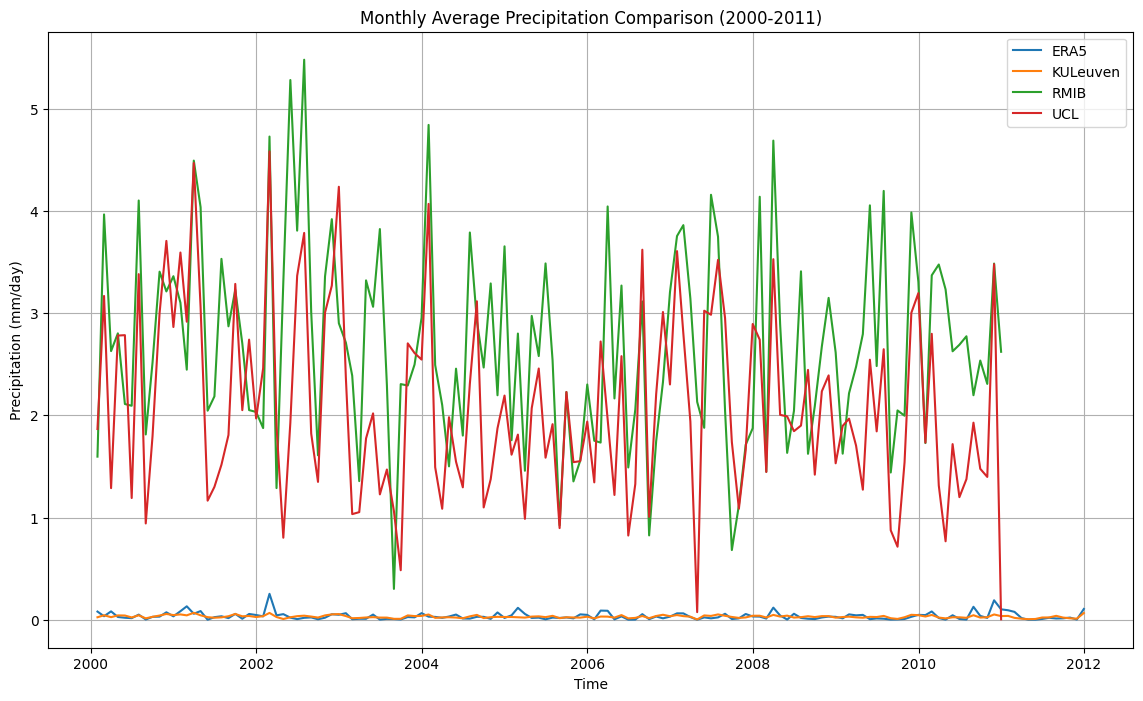

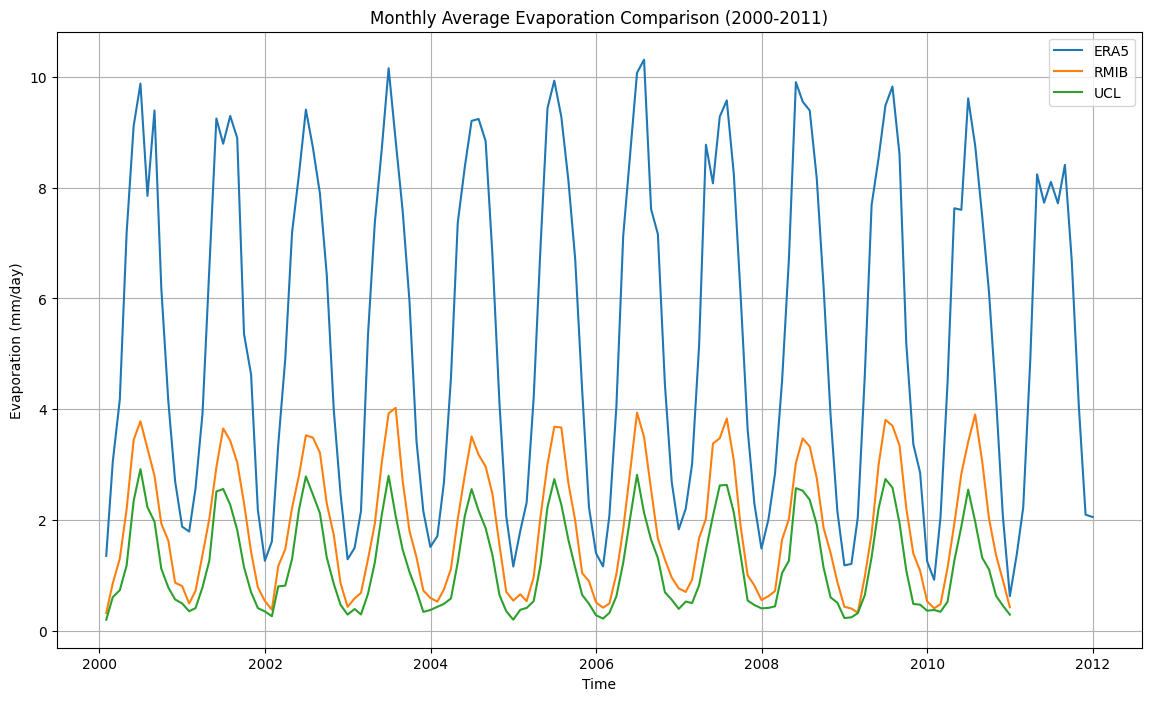

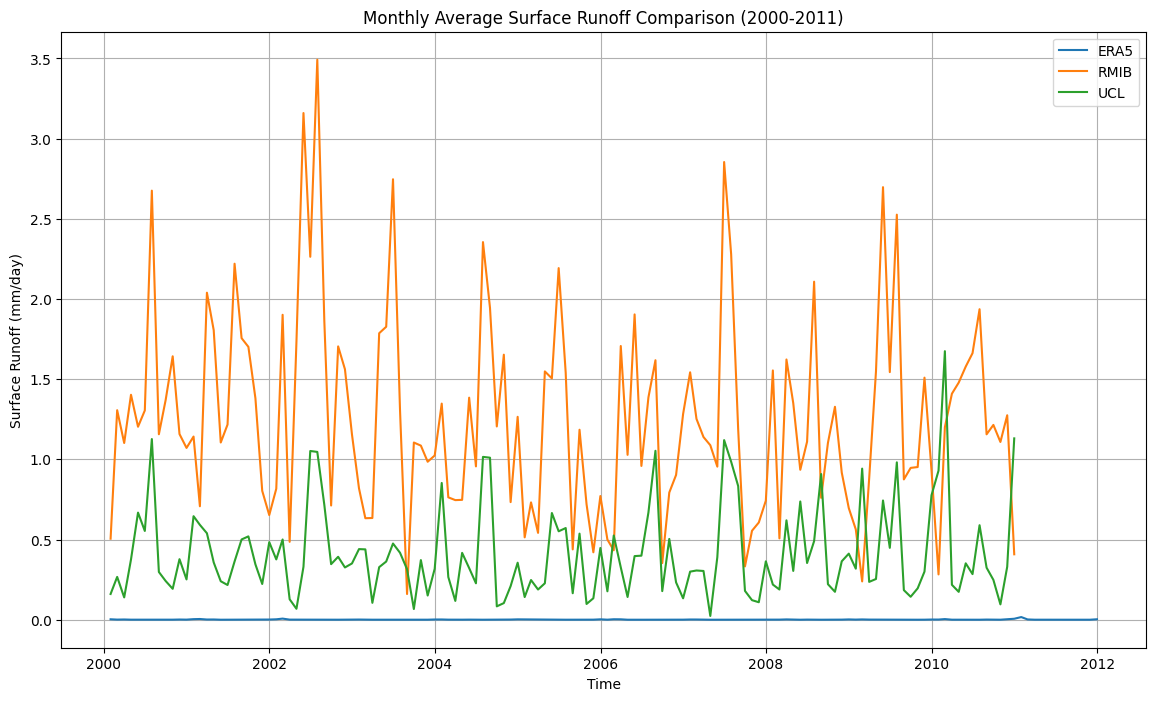

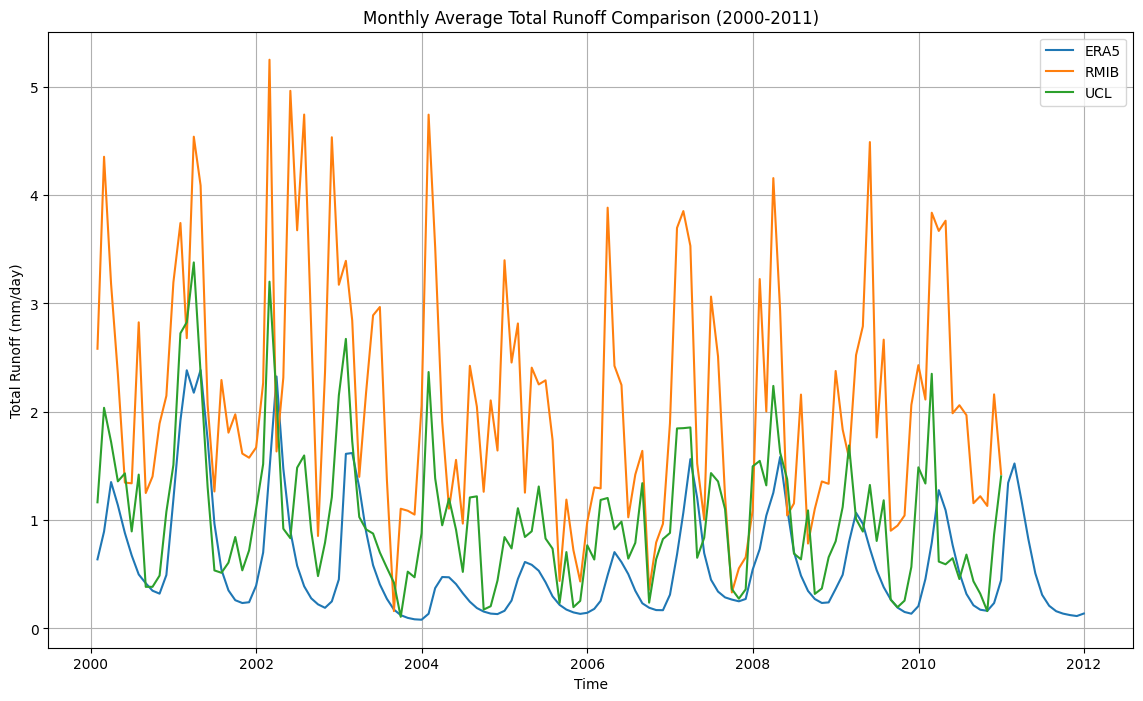

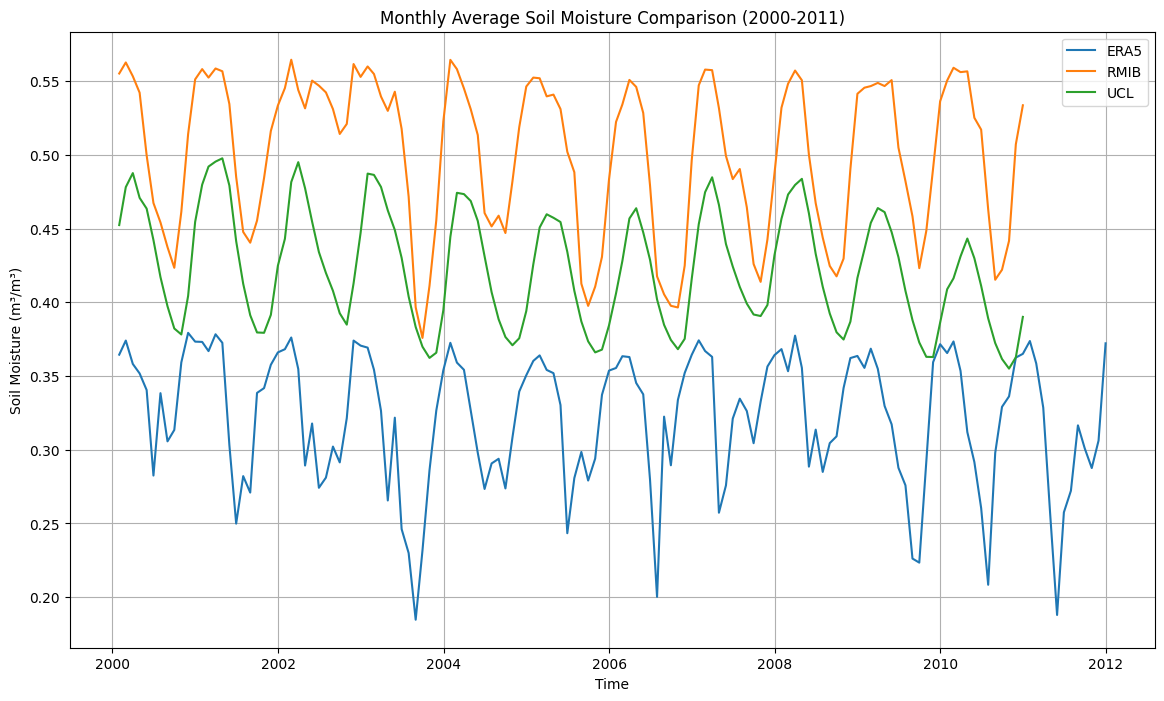

T-test for Precipitation (ERA5 vs. KULeuven):
TtestResult(statistic=1.7003592578524207, pvalue=0.09015044837188277, df=286.0)


In [32]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define the years for analysis
start_year = 2000
end_year = 2011

# Extract the relevant variables and subset the years of interest
era5_land_wba = era5_land_ds[['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']].sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
rmib_wba = rmib_ds[['pr', 'evspsbl', 'mrros', 'mrro', 'mrso']].sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
kul_wba = kul_ds[['pr']].sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
ucl_wba = ucl_ds[['pr', 'evspsbl', 'mrros', 'mrro', 'mrso']].sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))

# Convert to DataFrame for easier manipulation
era5_land_df = era5_land_wba.to_dataframe().reset_index()
rmib_df = rmib_wba.to_dataframe().reset_index()
kul_df = kul_wba.to_dataframe().reset_index()
ucl_df = ucl_wba.to_dataframe().reset_index()

# Ensure 'time' is set as index for resampling
era5_land_df.set_index('time', inplace=True)
rmib_df.set_index('time', inplace=True)
kul_df.set_index('time', inplace=True)
ucl_df.set_index('time', inplace=True)

# Resample to monthly averages
era5_land_monthly = era5_land_df.resample('ME').mean()
rmib_monthly = rmib_df.resample('ME').mean()
ucl_monthly = ucl_df.resample('ME').mean()

# Convert KULeuven precipitation from cumulative (kg/m²) to flux (kg/m²/s)
# To do this, we need to calculate the monthly total and then convert it to a flux
def cumulative_to_flux(cumulative_series):
    days_in_month = cumulative_series.index.days_in_month
    seconds_in_month = days_in_month * 24 * 3600
    return cumulative_series / seconds_in_month

kul_monthly = kul_df.resample('ME').sum()  # Sum the daily values to get monthly cumulative precipitation
kul_monthly['pr'] = cumulative_to_flux(kul_monthly['pr'])  # Convert to flux

# Unit Conversion
# Convert kg m-2 s-1 to mm/day (1 kg/m^2/s = 86400 mm/day)
def convert_flux_to_mm_day(df):
    return df * 86400

# Convert the units for flux variables
era5_land_monthly[['pr', 'evspsbl', 'mrros', 'mrro']] = convert_flux_to_mm_day(era5_land_monthly[['pr', 'evspsbl', 'mrros', 'mrro']])
rmib_monthly[['pr', 'evspsbl', 'mrros', 'mrro']] = convert_flux_to_mm_day(rmib_monthly[['pr', 'evspsbl', 'mrros', 'mrro']])
ucl_monthly[['pr', 'evspsbl', 'mrros', 'mrro']] = convert_flux_to_mm_day(ucl_monthly[['pr', 'evspsbl', 'mrros', 'mrro']])
kul_monthly['pr'] = convert_flux_to_mm_day(kul_monthly['pr'])  # Convert from kg/m²/s to mm/day

# Convert negative evaporation values to positive (assuming evaporation should be positive)
era5_land_monthly['evspsbl'] = era5_land_monthly['evspsbl'].abs()

# Convert soil moisture from kg/m² to m³/m³
# Assuming 1 kg/m² soil moisture content is equivalent to 1 mm water column, which equals 0.001 m³/m³
rmib_monthly['mrso'] = rmib_monthly['mrso'] * 0.001
ucl_monthly['mrso'] = ucl_monthly['mrso'] * 0.001

# Updated combined DataFrame for comparison after unit conversion
precipitation_comparison = pd.concat([era5_land_monthly[['pr']], kul_monthly[['pr']], rmib_monthly[['pr']], ucl_monthly[['pr']]],
                                     keys=['ERA5', 'KULeuven', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
precipitation_comparison.columns = precipitation_comparison.columns.droplevel(1)

evaporation_comparison = pd.concat([era5_land_monthly[['evspsbl']], rmib_monthly[['evspsbl']], ucl_monthly[['evspsbl']]],
                                   keys=['ERA5', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
evaporation_comparison.columns = evaporation_comparison.columns.droplevel(1)

surface_runoff_comparison = pd.concat([era5_land_monthly[['mrros']], rmib_monthly[['mrros']], ucl_monthly[['mrros']]],
                                     keys=['ERA5', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
surface_runoff_comparison.columns = surface_runoff_comparison.columns.droplevel(1)

total_runoff_comparison = pd.concat([era5_land_monthly[['mrro']], rmib_monthly[['mrro']], ucl_monthly[['mrro']]],
                                   keys=['ERA5', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
total_runoff_comparison.columns = total_runoff_comparison.columns.droplevel(1)

soil_moisture_comparison = pd.concat([era5_land_monthly[['swvl1']], rmib_monthly[['mrso']], ucl_monthly[['mrso']]],
                                    keys=['ERA5', 'RMIB', 'UCL'], axis=1, names=['Dataset'])
soil_moisture_comparison.columns = soil_moisture_comparison.columns.droplevel(1)

# Statistical Analysis
precipitation_stats = precipitation_comparison.describe()
evaporation_stats = evaporation_comparison.describe()
surface_runoff_stats = surface_runoff_comparison.describe()
total_runoff_stats = total_runoff_comparison.describe()
soil_moisture_stats = soil_moisture_comparison.describe()

print("Precipitation Statistics:")
print(precipitation_stats)
print("\nEvaporation Statistics:")
print(evaporation_stats)
print("\nSurface Runoff Statistics:")
print(surface_runoff_stats)
print("\nTotal Runoff Statistics:")
print(total_runoff_stats)
print("\nSoil Moisture Statistics:")
print(soil_moisture_stats)

# Plotting
def plot_comparison(df, title, ylabel):
    plt.figure(figsize=(14, 8))
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparison(precipitation_comparison, 'Monthly Average Precipitation Comparison (2000-2011)', 'Precipitation (mm/day)')
plot_comparison(evaporation_comparison, 'Monthly Average Evaporation Comparison (2000-2011)', 'Evaporation (mm/day)')
plot_comparison(surface_runoff_comparison, 'Monthly Average Surface Runoff Comparison (2000-2011)', 'Surface Runoff (mm/day)')
plot_comparison(total_runoff_comparison, 'Monthly Average Total Runoff Comparison (2000-2011)', 'Total Runoff (mm/day)')
plot_comparison(soil_moisture_comparison, 'Monthly Average Soil Moisture Comparison (2000-2011)', 'Soil Moisture (m³/m³)')

# Statistical Tests (Example: T-test)
# T-test for precipitation between ERA5 and KULeuven
ttest_precipitation = ttest_ind(precipitation_comparison['ERA5'], precipitation_comparison['KULeuven'])

print("T-test for Precipitation (ERA5 vs. KULeuven):")
print(ttest_precipitation)


## The code below is not needed to be discussed during the meeting

## Checking if data is on the same grid

By attempting the subtraction directly, the code implicitly checks:

Same dimensions: The datasets must have the same shape (number of time steps, latitude points, and longitude points).

Same coordinate values: The actual values of the time, latitude, and longitude coordinates must match.

In [28]:
# Extract the relevant temperature variables and ensure eobs_tas_ds is in Kelvin
era5_temp = era5_land_ds['t2m']
kul_temp = kul_ds['tas']
rmib_temp = rmib_ds['tas']
ucl_temp = ucl_ds['tas']
eobs_temp = eobs_tas_ds['tg'] + 273.15  # Convert Celsius to Kelvin

# Define a function to check if the datasets have the same time and spatial coordinates
def check_grid_alignment(ref_temp, compare_temp, name):
    try:
        # Attempt to subtract the datasets
        difference = ref_temp - compare_temp
        print(f"{name} is on the same grid.")
    except ValueError:
        print(f"{name} is NOT on the same grid.")

# Perform the grid alignment check
check_grid_alignment(era5_temp, kul_temp, 'ERA5 and KUL')
check_grid_alignment(era5_temp, rmib_temp, 'ERA5 and RMIB')
check_grid_alignment(era5_temp, ucl_temp, 'ERA5 and UCL')
check_grid_alignment(era5_temp, eobs_temp, 'ERA5 and EOBS')



ERA5 and KUL is on the same grid.
ERA5 and RMIB is on the same grid.
ERA5 and UCL is on the same grid.
ERA5 and EOBS is on the same grid.


Checking the shape of variables

In [25]:
import xarray as xr
import matplotlib.pyplot as plt

# Select January 1980 for each dataset
era5_temp = era5_land_ds['t2m'].sel(time=slice('1980-01-01', '1980-01-31'))
kul_temp = kul_ds['tas'].sel(time=slice('1980-01-01', '1980-01-31'))
rmib_temp = rmib_ds['tas'].sel(time=slice('1980-01-01', '1980-01-31'))
ucl_temp = ucl_ds['tas'].sel(time=slice('1980-01-01', '1980-01-31'))
eobs_temp = (eobs_tas_ds['tg'] + 273.15).sel(time=slice('1980-01-01', '1980-01-31'))  # Convert Celsius to Kelvin

# Check the data 
print(f'ERA5 temp shape: {era5_temp.shape}') # time, latitude, longitude
print(f'KUL temp shape: {kul_temp.shape}')
print(f'RMIB temp shape: {rmib_temp.shape}')
print(f'UCL temp shape: {ucl_temp.shape}')
print(f'EOBS temp shape: {eobs_temp.shape}')


ERA5 temp shape: (62, 25, 41)
KUL temp shape: (93, 25, 41)
RMIB temp shape: (31, 25, 41)
UCL temp shape: (155, 25, 41)
EOBS temp shape: (31, 25, 41)


Checking time intervals and frequencies of the datasets


Time Intervals and Frequencies for ERA5:
Interval: 0.5 hours, Count: 31
Interval: 23.5 hours, Count: 30

Actual time values for ERA5:
['1980-01-01T11:00:00.000000000' '1980-01-01T11:30:00.000000000'
 '1980-01-02T11:00:00.000000000' '1980-01-02T11:30:00.000000000'
 '1980-01-03T11:00:00.000000000' '1980-01-03T11:30:00.000000000'
 '1980-01-04T11:00:00.000000000' '1980-01-04T11:30:00.000000000'
 '1980-01-05T11:00:00.000000000' '1980-01-05T11:30:00.000000000'
 '1980-01-06T11:00:00.000000000' '1980-01-06T11:30:00.000000000'
 '1980-01-07T11:00:00.000000000' '1980-01-07T11:30:00.000000000'
 '1980-01-08T11:00:00.000000000' '1980-01-08T11:30:00.000000000'
 '1980-01-09T11:00:00.000000000' '1980-01-09T11:30:00.000000000'
 '1980-01-10T11:00:00.000000000' '1980-01-10T11:30:00.000000000'
 '1980-01-11T11:00:00.000000000' '1980-01-11T11:30:00.000000000'
 '1980-01-12T11:00:00.000000000' '1980-01-12T11:30:00.000000000'
 '1980-01-13T11:00:00.000000000' '1980-01-13T11:30:00.000000000'
 '1980-01-14T11:00:0

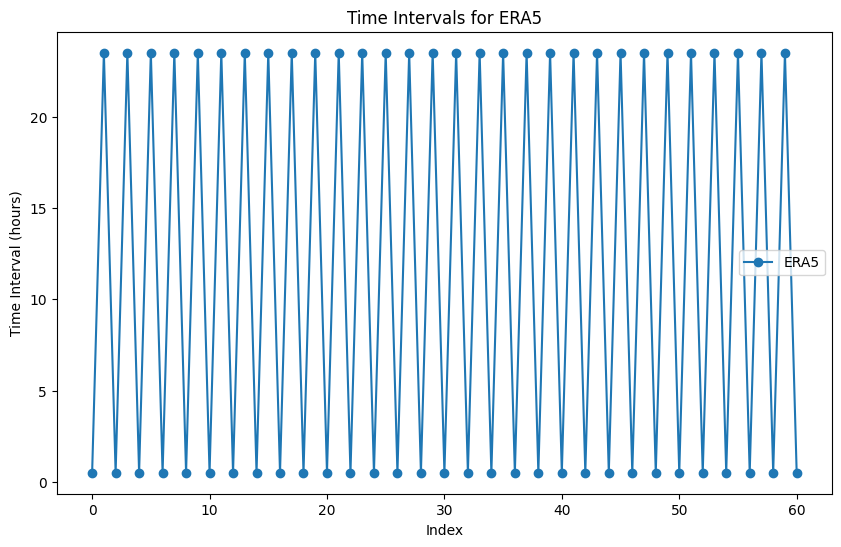

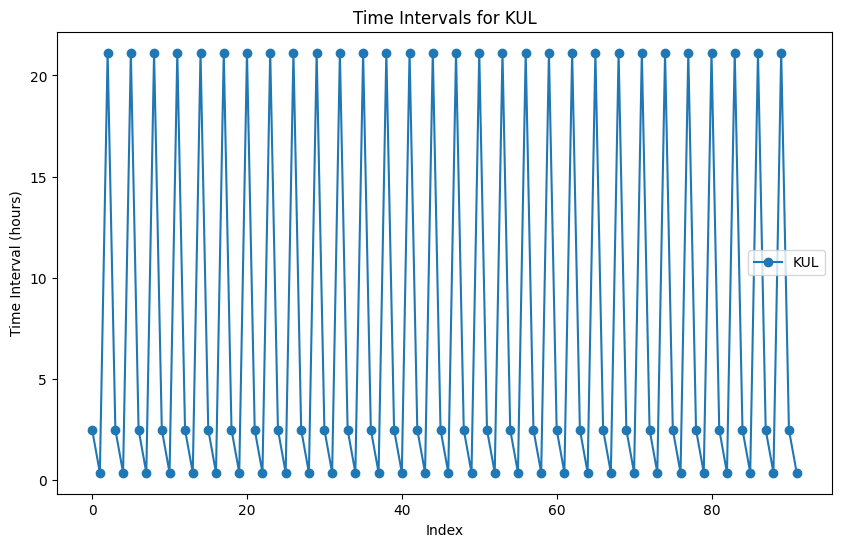

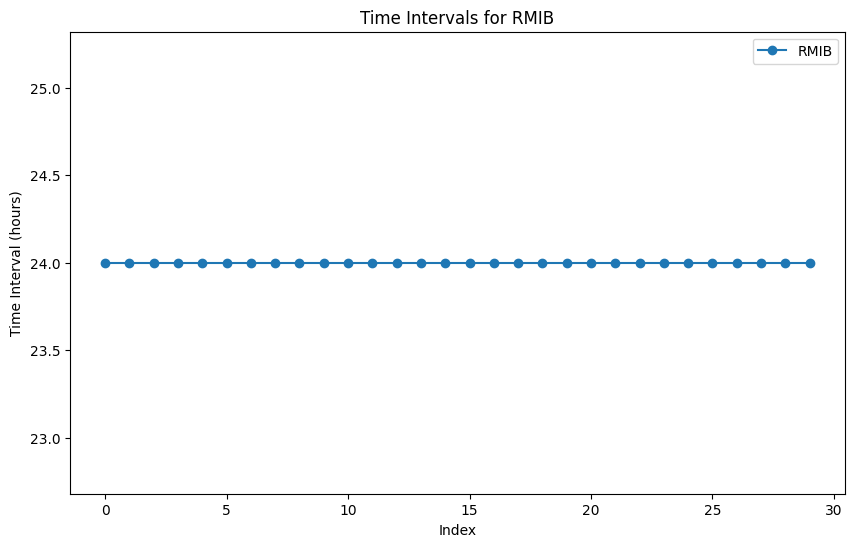

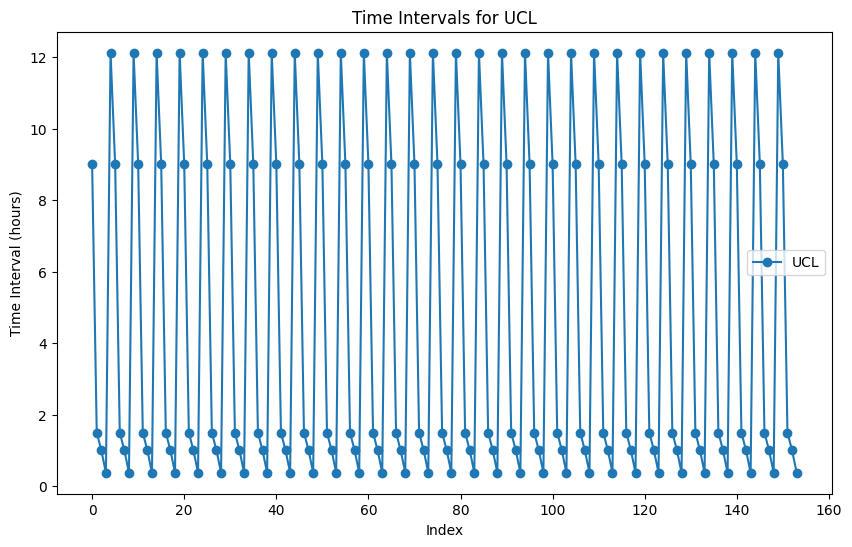

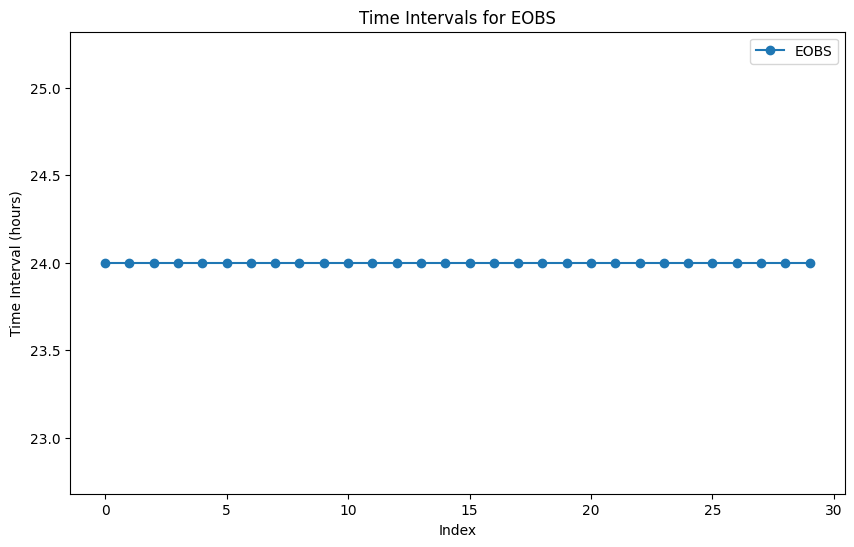

In [33]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Select January 1980 for each dataset
era5_temp = era5_land_ds['t2m'].sel(time=slice('1980-01-01', '1980-01-31'))
kul_temp = kul_ds['tas'].sel(time=slice('1980-01-01', '1980-01-31'))
rmib_temp = rmib_ds['tas'].sel(time=slice('1980-01-01', '1980-01-31'))
ucl_temp = ucl_ds['tas'].sel(time=slice('1980-01-01', '1980-01-31'))
eobs_temp = (eobs_tas_ds['tg'] + 273.15).sel(time=slice('1980-01-01', '1980-01-31'))  # Convert Celsius to Kelvin

# Function to check time intervals
def check_time_intervals(temp_data, name):
    time_diff = temp_data['time'].diff('time')
    time_diff_hours = time_diff.dt.total_seconds() / 3600  # Convert to hours

    print(f"\nTime Intervals and Frequencies for {name}:")
    unique_intervals, counts = np.unique(time_diff_hours, return_counts=True)
    for interval, count in zip(unique_intervals, counts):
        print(f"Interval: {interval} hours, Count: {count}")
    
    # Print actual time values for further inspection
    print(f"\nActual time values for {name}:")
    print(temp_data['time'].values)

# Check time intervals for each dataset
check_time_intervals(era5_temp, "ERA5")
check_time_intervals(kul_temp, "KUL")
check_time_intervals(rmib_temp, "RMIB")
check_time_intervals(ucl_temp, "UCL")
check_time_intervals(eobs_temp, "EOBS")

# Function to plot time intervals
def plot_time_intervals(temp_data, name):
    time_diff = temp_data['time'].diff('time').dt.total_seconds() / 3600  # Convert to hours

    plt.figure(figsize=(10, 6))
    plt.plot(time_diff, marker='o', linestyle='-', label=name)
    plt.xlabel('Index')
    plt.ylabel('Time Interval (hours)')
    plt.title(f'Time Intervals for {name}')
    plt.legend()
    plt.show()

# Plot time intervals for each dataset
plot_time_intervals(era5_temp, "ERA5")
plot_time_intervals(kul_temp, "KUL")
plot_time_intervals(rmib_temp, "RMIB")
plot_time_intervals(ucl_temp, "UCL")
plot_time_intervals(eobs_temp, "EOBS")


Printing the sequences 

In [35]:
import xarray as xr
import matplotlib.pyplot as plt

# Function to check and print time interval sequence
def check_time_interval_sequence(temp_data, name):
    time_diff = temp_data['time'].diff('time')
    time_diff_hours = time_diff.dt.total_seconds() / 3600  # Convert to hours

    print(f"\nTime Interval Sequence for {name}:")
    for interval in time_diff_hours.values:
        print(interval, end=' ')
    print()

# Check time interval sequence for each dataset
check_time_interval_sequence(era5_temp, "ERA5")
check_time_interval_sequence(kul_temp, "KUL")
check_time_interval_sequence(ucl_temp, "UCL")



Time Interval Sequence for ERA5:
0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 23.5 0.5 

Time Interval Sequence for KUL:
2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 21.125 2.5 0.375 

Time Interval Sequence for UCL:
9.0 1.5 1.0 0.375 12.125 9.0 1.5 1.0 0.375 12.125 9.0 1.5 1.0 0.375 12.125 9.0 1.5 1.0 0.375 12.125 9.0 

A few figures to check

In [58]:
import xarray as xr
import matplotlib.pyplot as plt

def plot_spatial_distribution(data, title, cmap='viridis'):
    plt.figure(figsize=(10, 10))
    data.plot(cmap=cmap)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

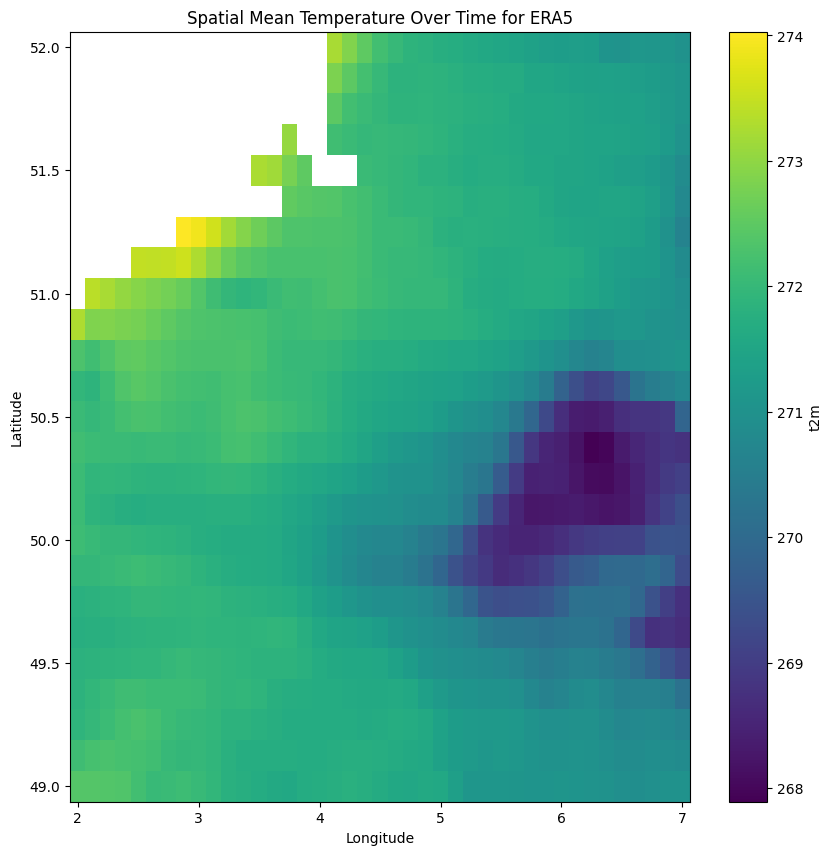

In [59]:
# Calculate spatial mean over time for ERA5
spatial_mean_era5 = era5_temp.mean(dim='time', skipna=True)

# Plot spatial distribution for ERA5
plot_spatial_distribution(spatial_mean_era5, 'Spatial Mean Temperature Over Time for ERA5')

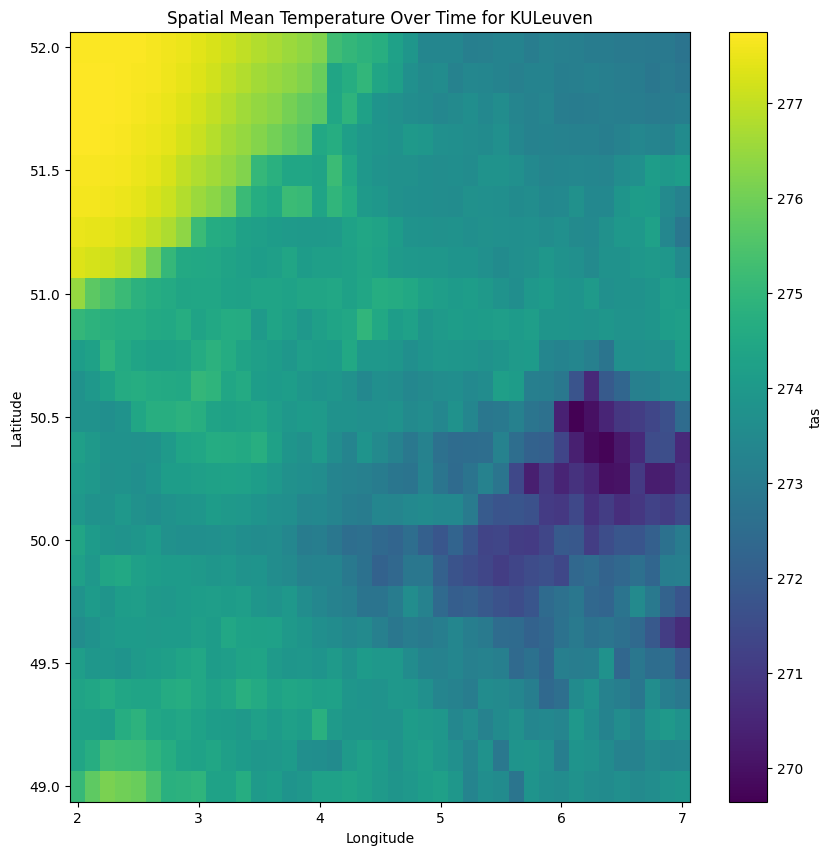

In [60]:
# Calculate spatial mean over time for KULeuven
spatial_mean_kul = kul_temp.mean(dim='time', skipna=True)

# Plot spatial distribution for KULeuven
plot_spatial_distribution(spatial_mean_kul, 'Spatial Mean Temperature Over Time for KULeuven')


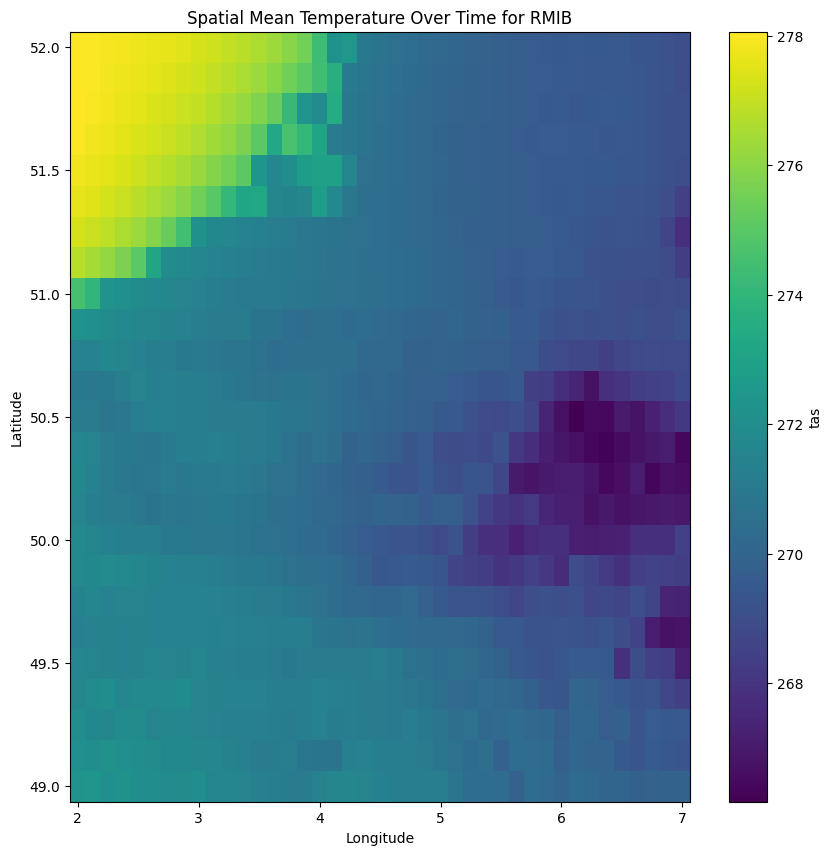

In [61]:
# Calculate spatial mean over time for RMIB
spatial_mean_rmib = rmib_temp.mean(dim='time', skipna=True)

# Plot spatial distribution for RMIB
plot_spatial_distribution(spatial_mean_rmib, 'Spatial Mean Temperature Over Time for RMIB')


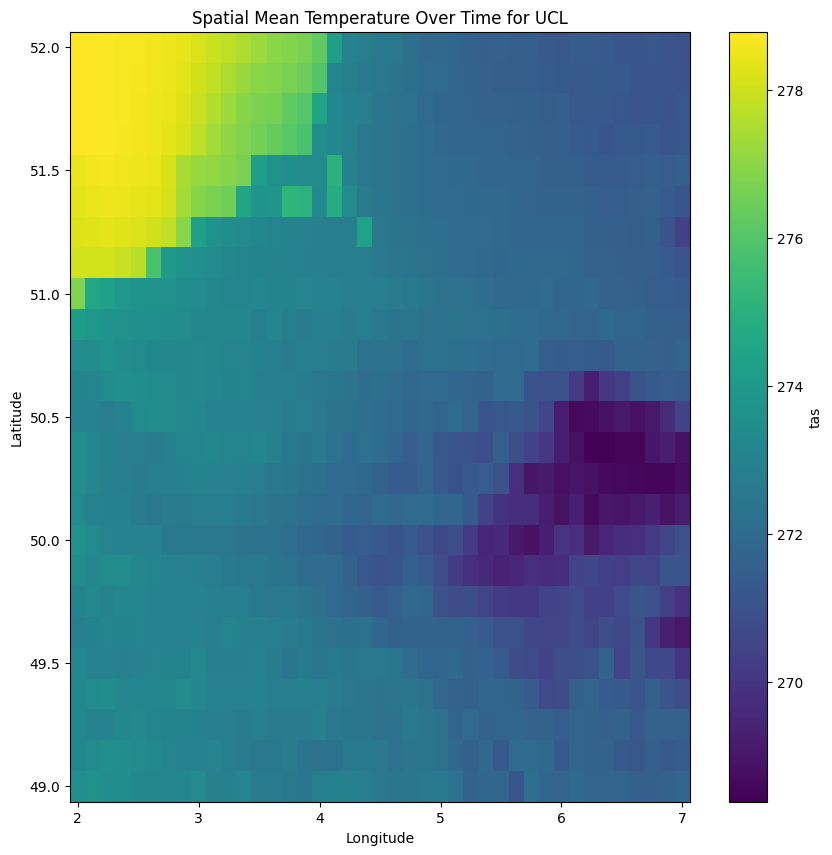

In [62]:
# Calculate spatial mean over time for UCL
spatial_mean_ucl = ucl_temp.mean(dim='time', skipna=True)

# Plot spatial distribution for UCL
plot_spatial_distribution(spatial_mean_ucl, 'Spatial Mean Temperature Over Time for UCL')


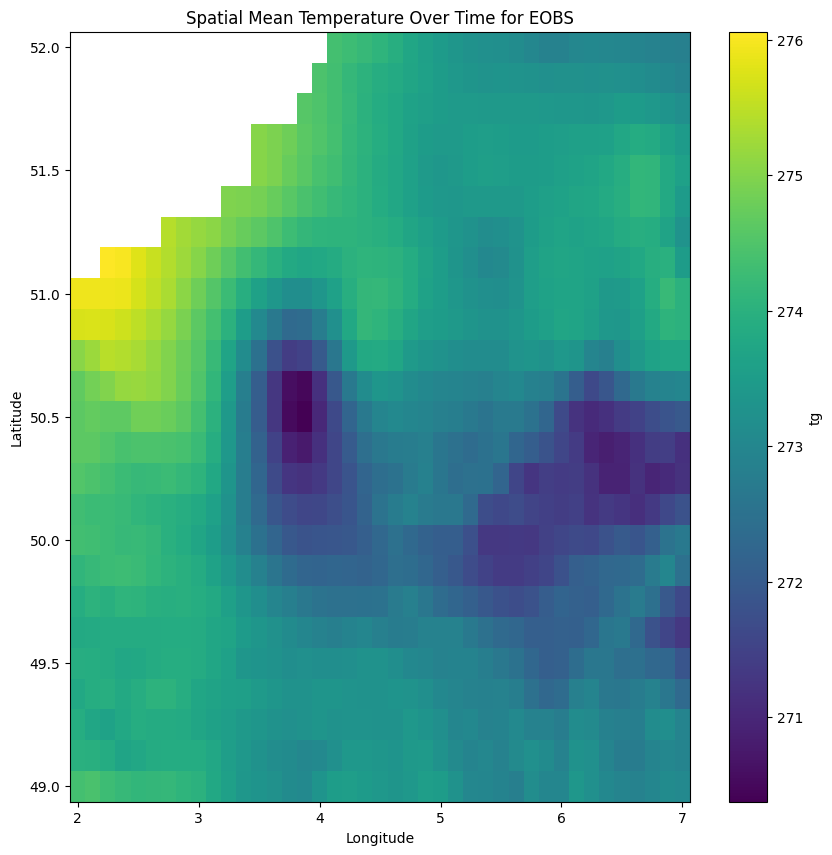

In [63]:
# Calculate spatial mean over time for EOBS
spatial_mean_eobs = eobs_temp.mean(dim='time', skipna=True)

# Plot spatial distribution for EOBS
plot_spatial_distribution(spatial_mean_eobs, 'Spatial Mean Temperature Over Time for EOBS')

Plots of relevant variables against time: to check 

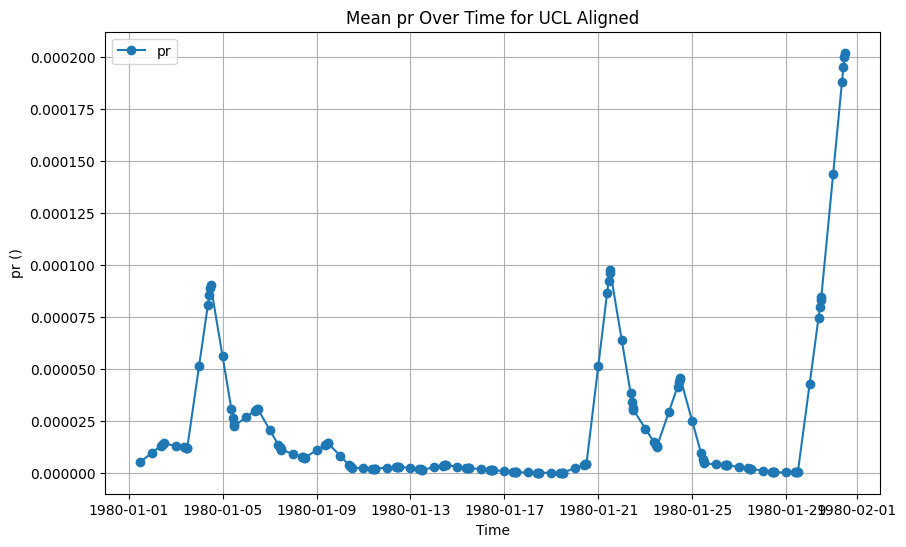

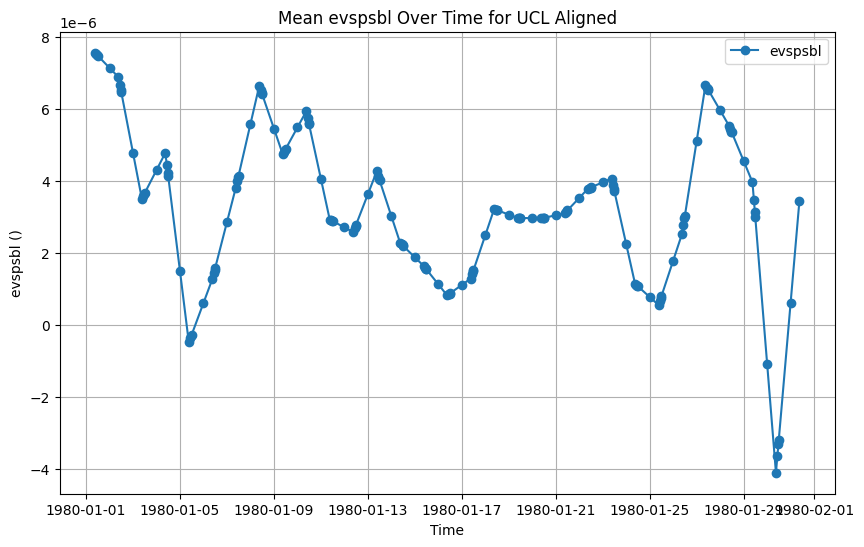

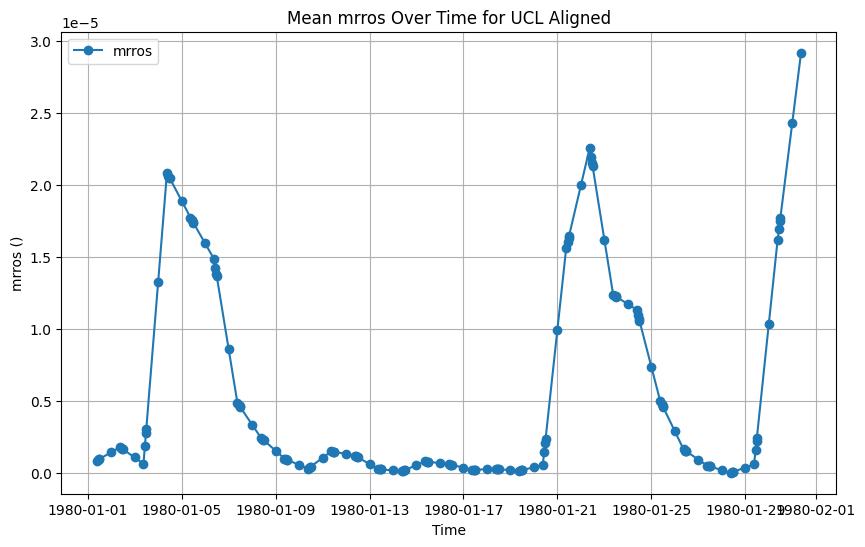

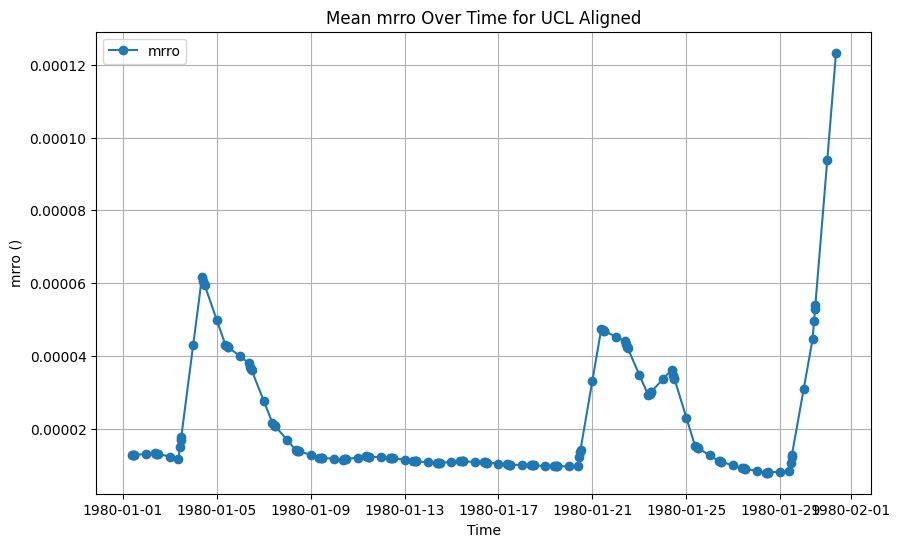

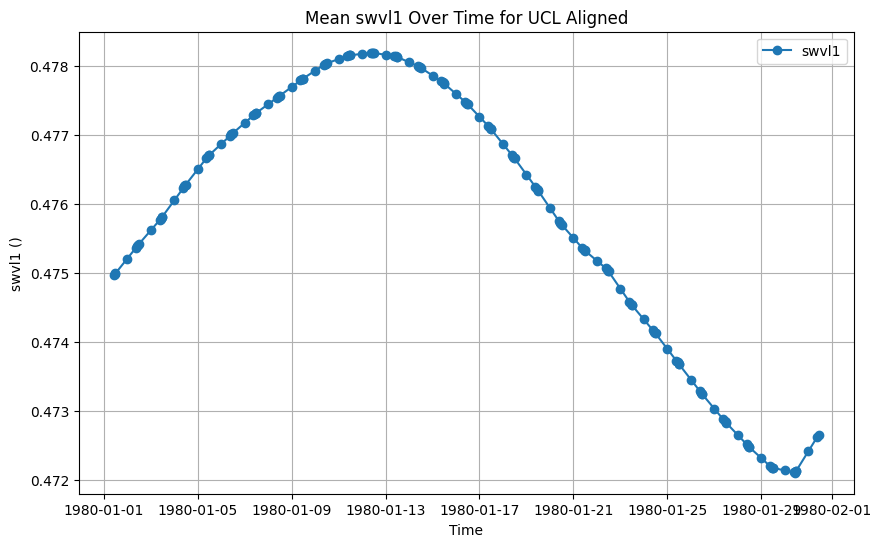

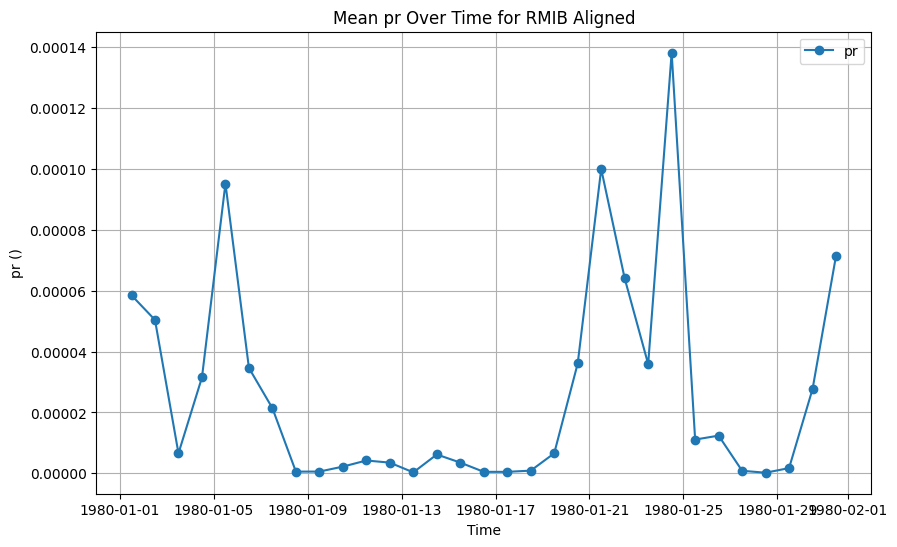

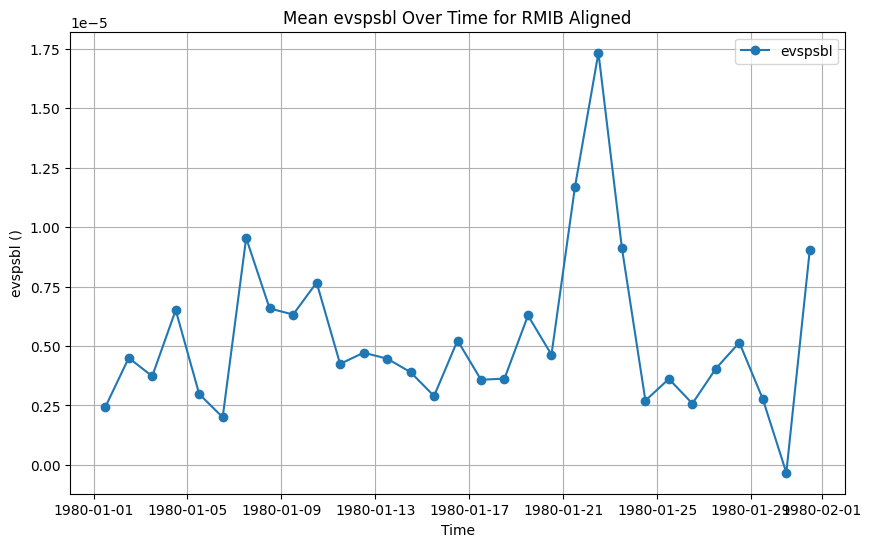

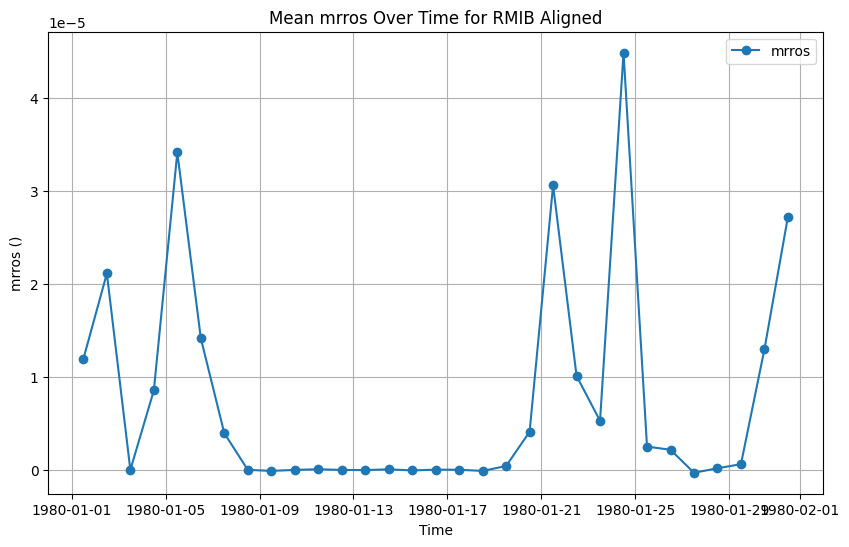

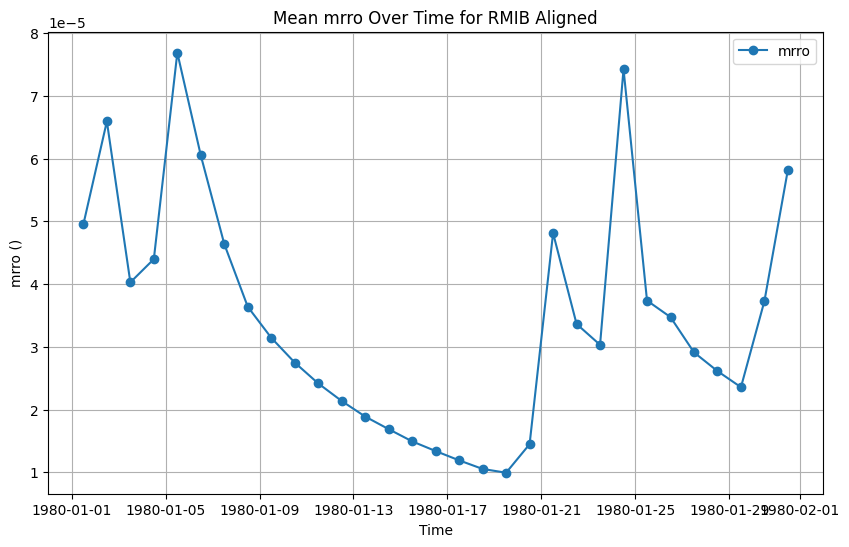

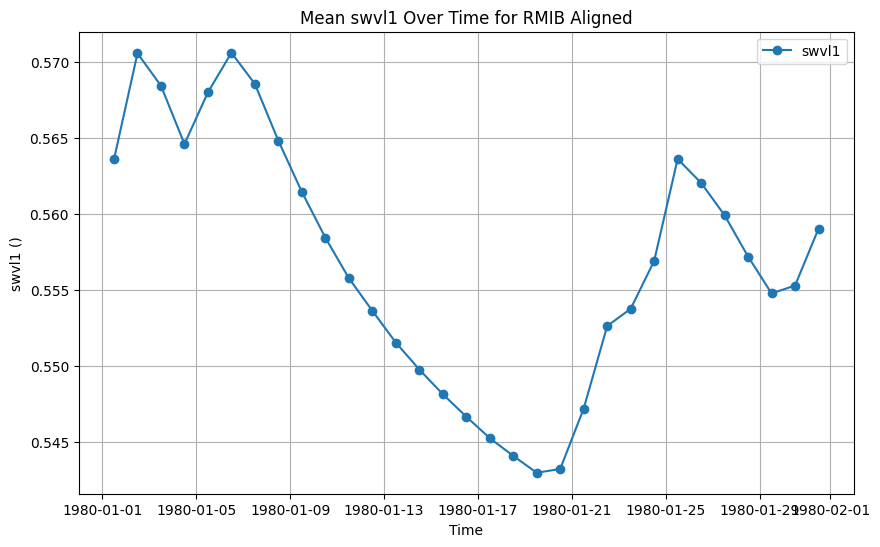

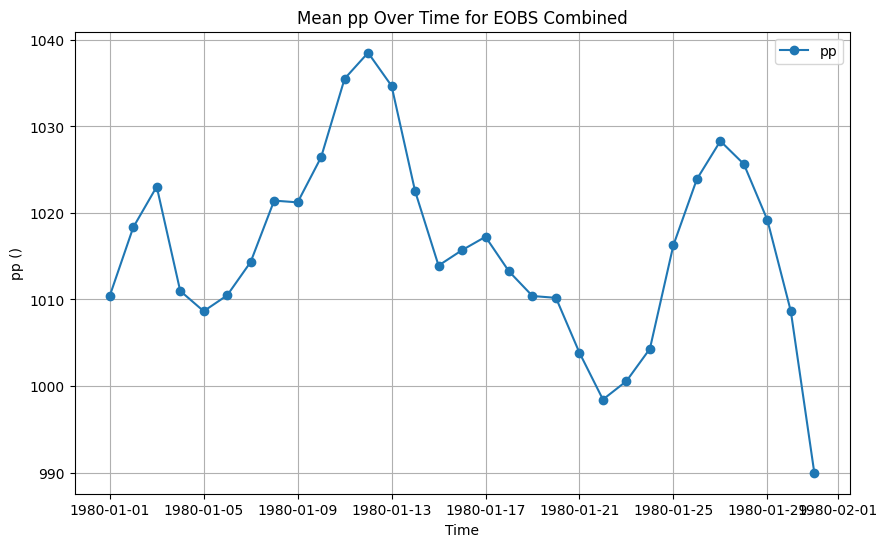

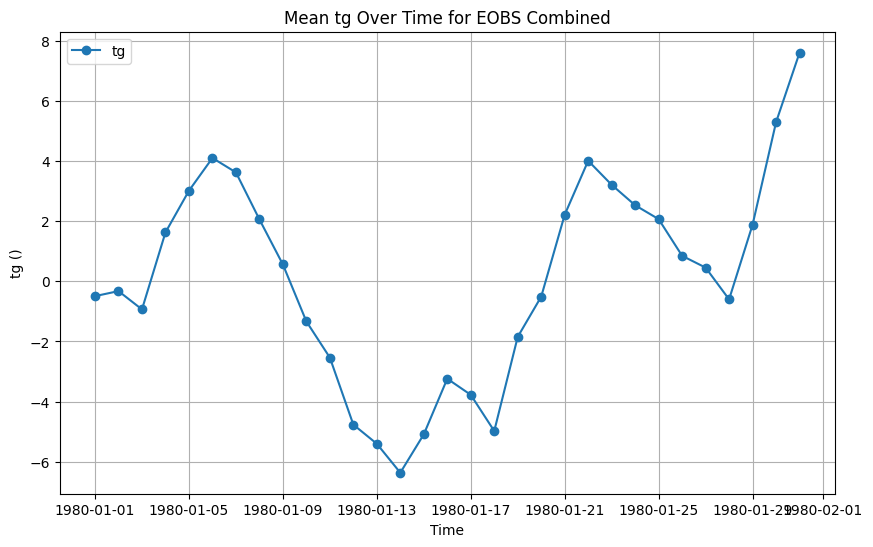

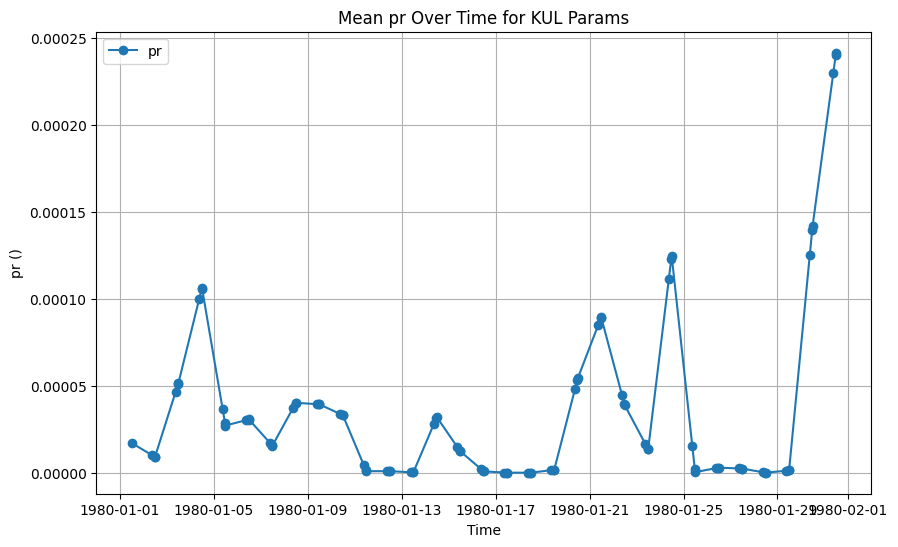

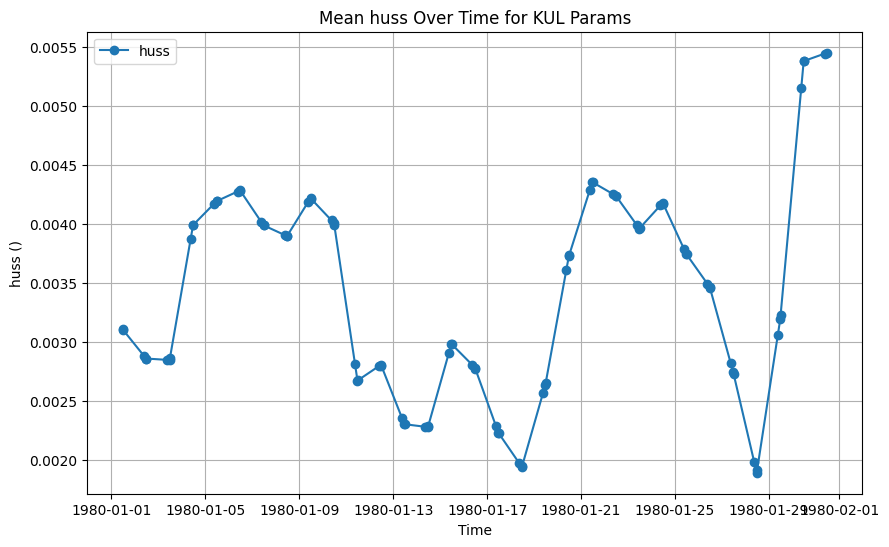

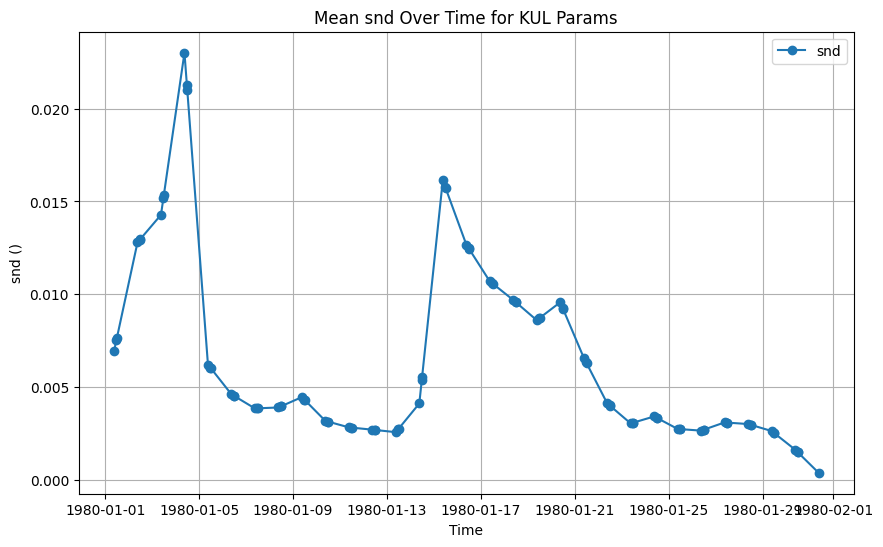

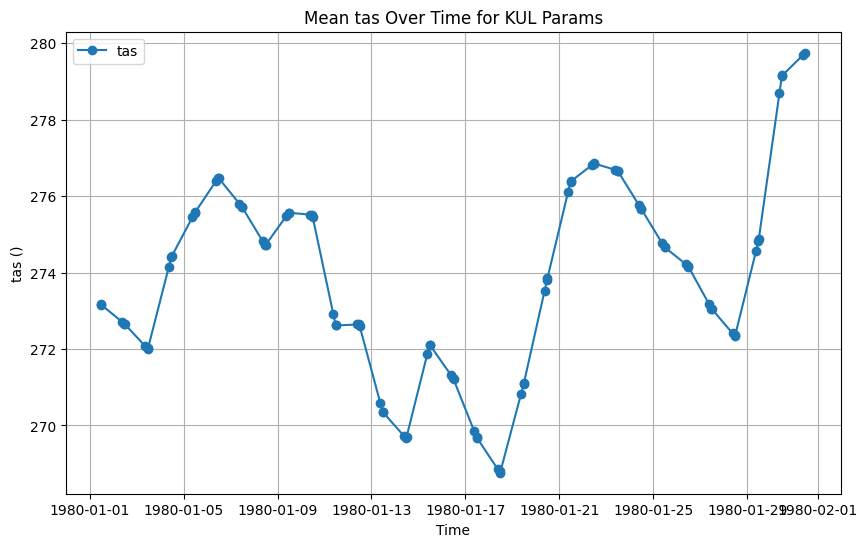

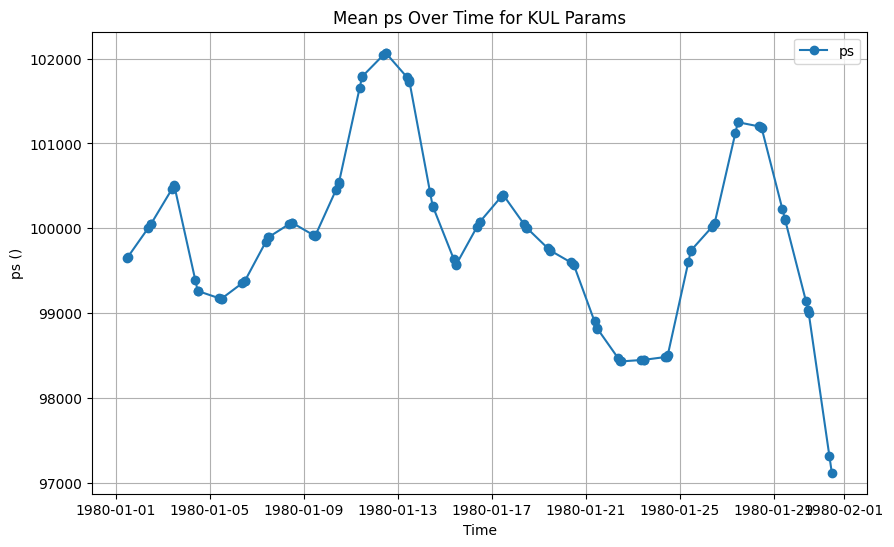

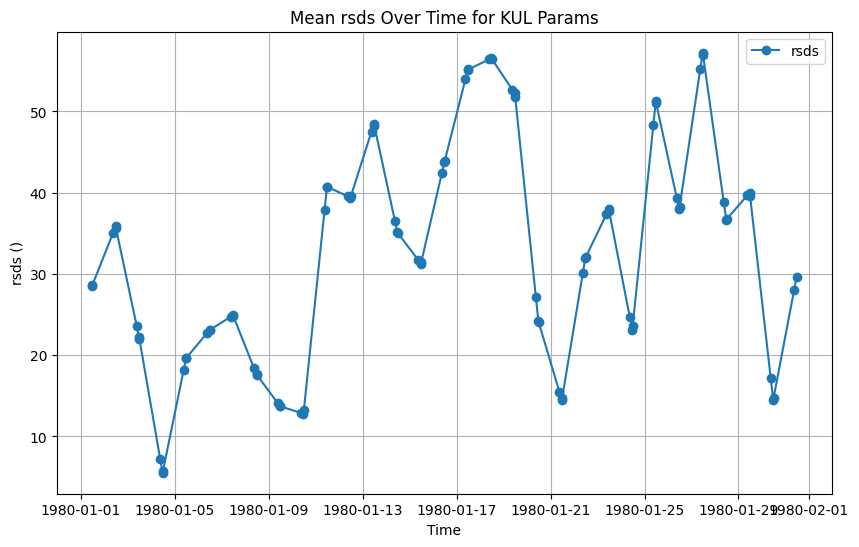

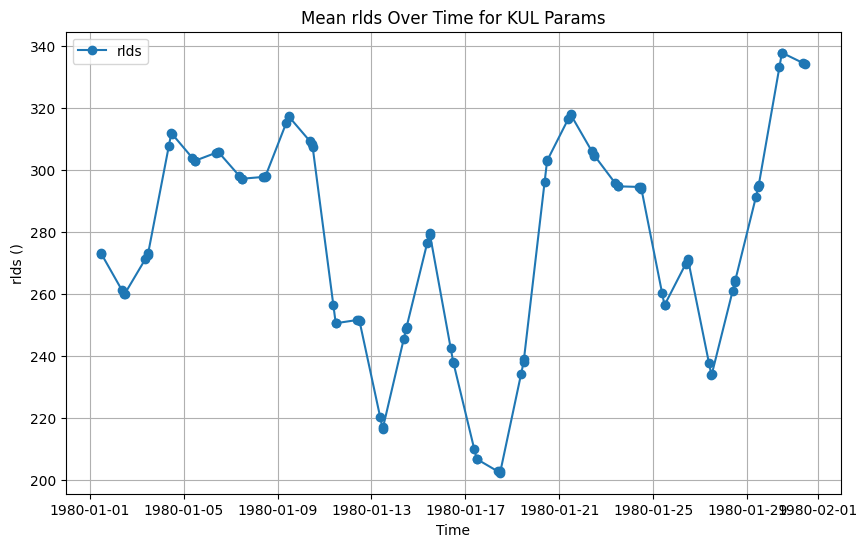

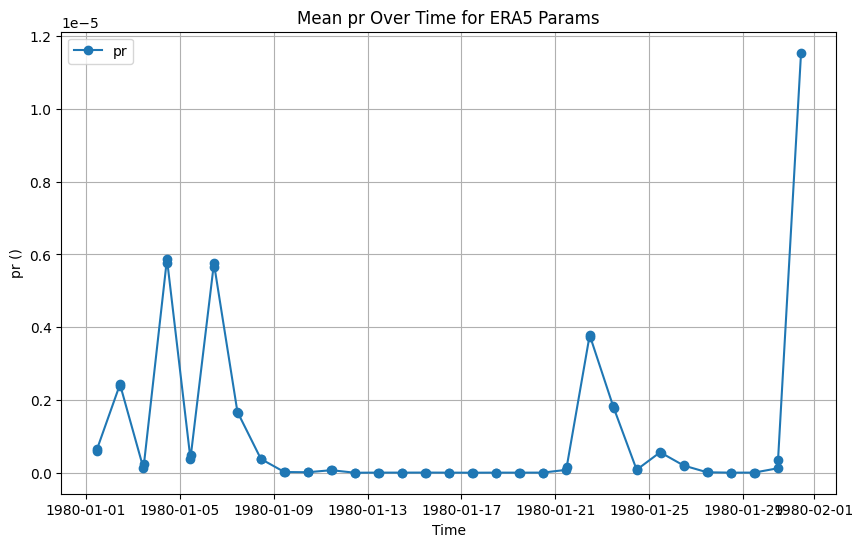

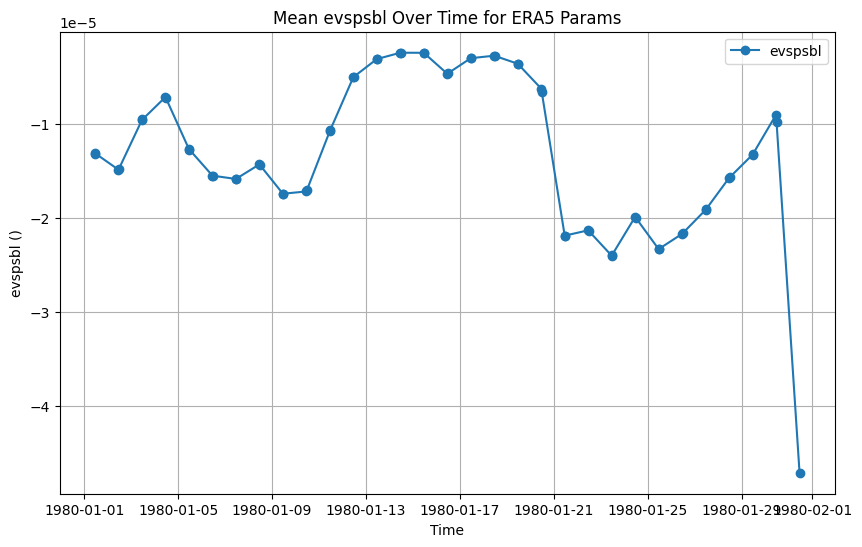

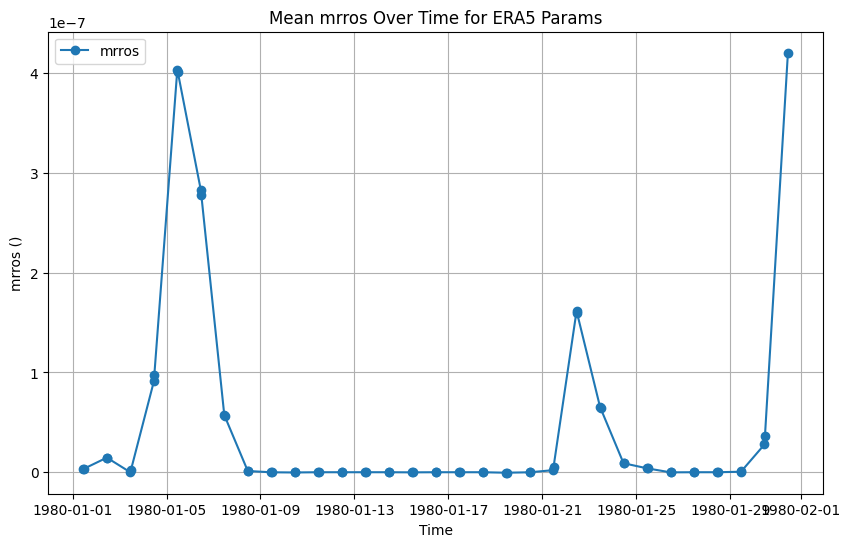

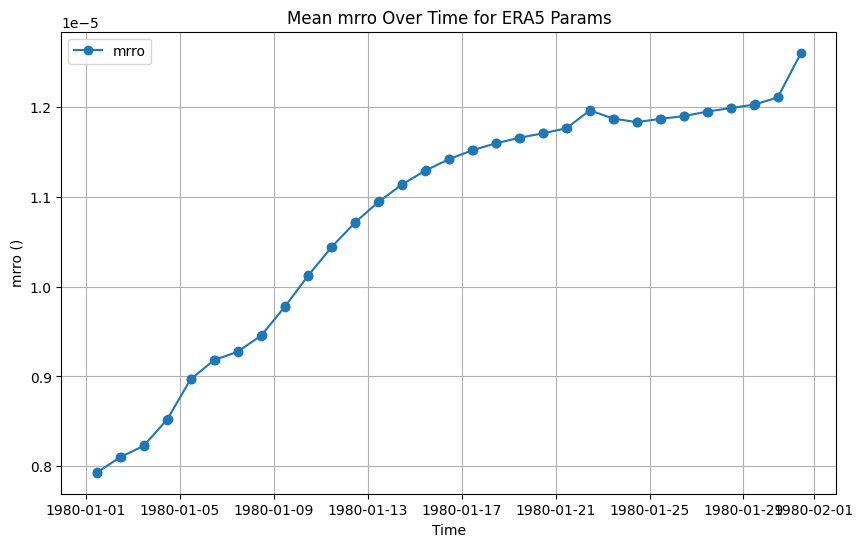

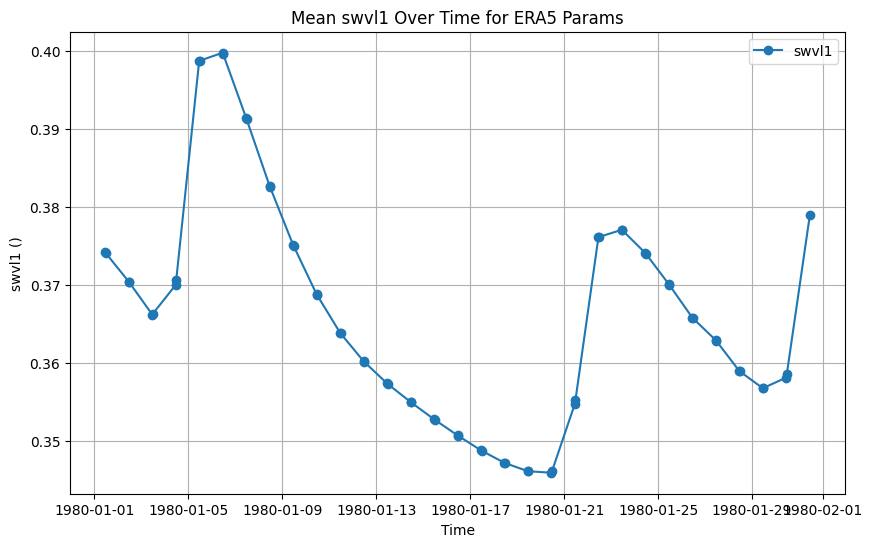

In [19]:
import xarray as xr
import matplotlib.pyplot as plt

# Function to plot mean values over time for January 1980
def plot_mean_values(datasets, variables, titles):
    # Define the time period
    time_slice = slice('1980-01-01', '1980-01-31')

    for dataset, var_set, title in zip(datasets, variables, titles):
        ds_jan = dataset.sel(time=time_slice)
        ds_jan = ds_jan.chunk({'time': -1})  # Rechunk along the time dimension
        
        for variable in var_set:
            if variable in ds_jan.variables:
                data = ds_jan[variable]
                if 'soil1' in data.dims:
                    data_mean = data.mean(dim=['soil1', 'lat', 'lon'], skipna=True)
                else:
                    data_mean = data.mean(dim=['lat', 'lon'], skipna=True)

                # Interpolate missing values if necessary
                data_mean_interp = data_mean.interpolate_na(dim='time', method='linear')

                # Plot the data
                plt.figure(figsize=(10, 6))
                plt.plot(data_mean_interp.time, data_mean_interp, 'o-', label=variable)
                plt.xlabel('Time')
                plt.ylabel(f'{variable} ({data_mean_interp.attrs.get("units", "")})')
                plt.title(f'Mean {variable} Over Time for {title}')
                plt.legend()
                plt.grid(True)
                plt.show()


# Define the datasets and variables 
datasets = [ucl_aligned, rmib_aligned, eobs_combined_params, kul_params, era5_params]
variables = [
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pp', 'tg'],
    ['pr', 'huss', 'snd', 'tas', 'ps', 'rsds', 'rlds'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']
]
titles = ['UCL Aligned', 'RMIB Aligned', 'EOBS Combined', 'KUL Params', 'ERA5 Params']

plot_mean_values(datasets, variables, titles)


In [21]:
# Function to print all NaN values for each dataset and variable
def print_nan_values(datasets, variables, titles):
    time_slice = slice('1980-01-01', '1980-01-31')

    for dataset, var_set, title in zip(datasets, variables, titles):
        ds_jan = dataset.sel(time=time_slice)
        
        for variable in var_set:
            if variable in ds_jan.variables:
                data = ds_jan[variable]
                if 'soil1' in data.dims:
                    data_mean = data.mean(dim=['soil1', 'lat', 'lon'], skipna=True)
                else:
                    data_mean = data.mean(dim=['lat', 'lon'], skipna=True)

                nan_values = data_mean.isnull().sum().compute()
                print(f'{title} - {variable}: {nan_values.values} NaN values')


# Define the datasets and variables
datasets = [ucl_aligned, rmib_aligned, eobs_combined_params, kul_params, era5_params]
variables = [
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pp', 'tg'],
    ['pr', 'huss', 'snd', 'tas', 'ps', 'rsds', 'rlds'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']
]
titles = ['UCL Aligned', 'RMIB Aligned', 'EOBS Combined', 'KUL Params', 'ERA5 Params']

print_nan_values(datasets, variables, titles)



UCL Aligned - pr: 124 NaN values
UCL Aligned - evspsbl: 124 NaN values
UCL Aligned - mrros: 124 NaN values
UCL Aligned - mrro: 124 NaN values
UCL Aligned - swvl1: 124 NaN values
RMIB Aligned - pr: 0 NaN values
RMIB Aligned - evspsbl: 0 NaN values
RMIB Aligned - mrros: 0 NaN values
RMIB Aligned - mrro: 0 NaN values
RMIB Aligned - swvl1: 0 NaN values
EOBS Combined - pp: 0 NaN values
EOBS Combined - tg: 0 NaN values
KUL Params - pr: 62 NaN values
KUL Params - huss: 62 NaN values
KUL Params - snd: 62 NaN values
KUL Params - tas: 62 NaN values
KUL Params - ps: 62 NaN values
KUL Params - rsds: 62 NaN values
KUL Params - rlds: 62 NaN values
ERA5 Params - pr: 31 NaN values
ERA5 Params - evspsbl: 31 NaN values
ERA5 Params - mrros: 31 NaN values
ERA5 Params - mrro: 31 NaN values
ERA5 Params - swvl1: 31 NaN values


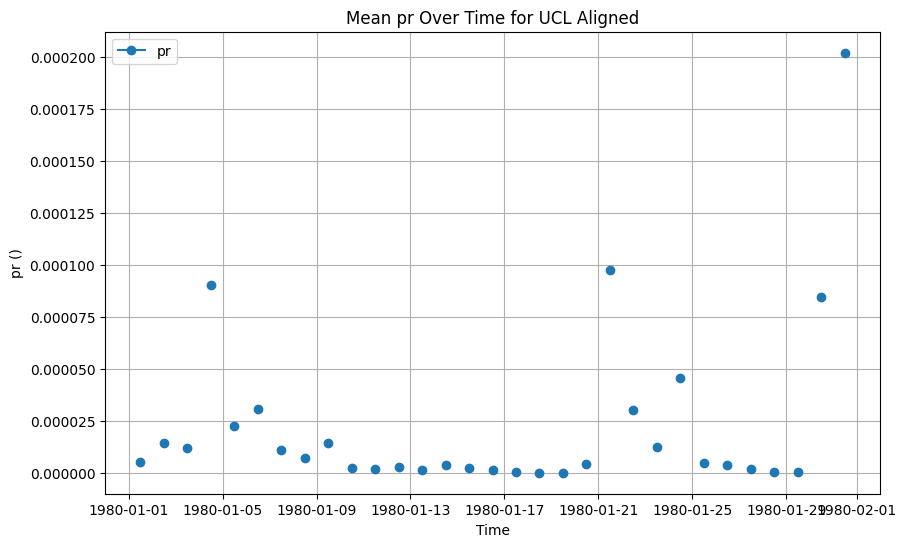

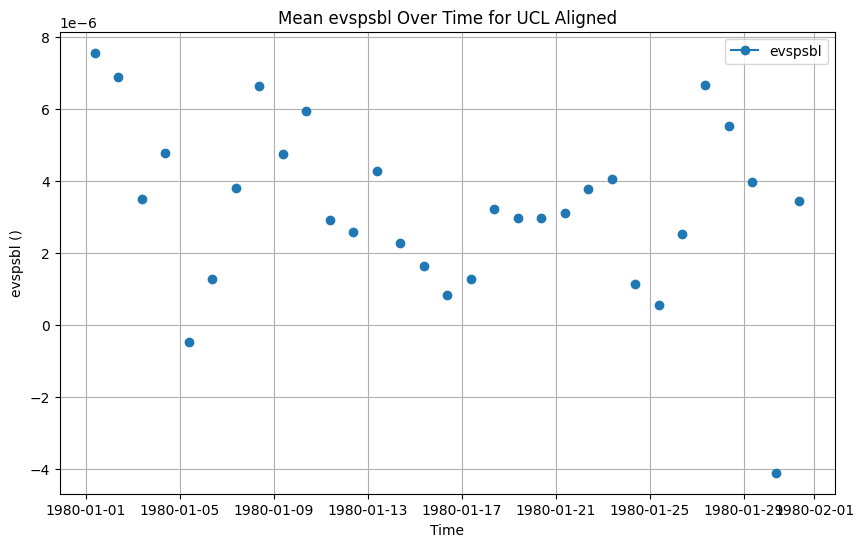

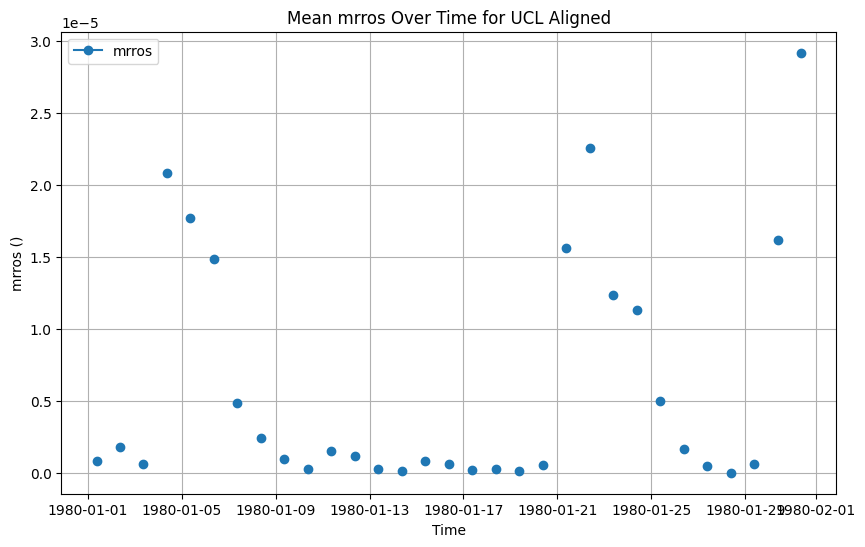

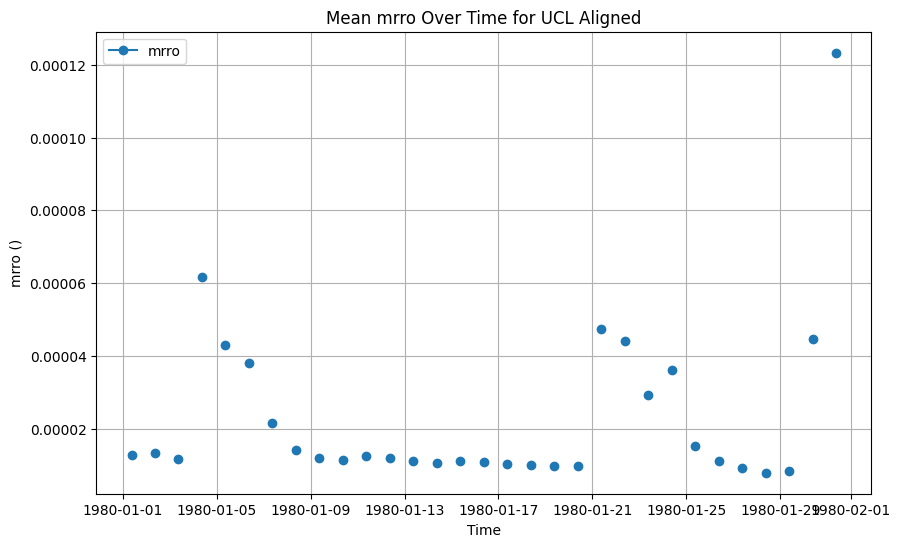

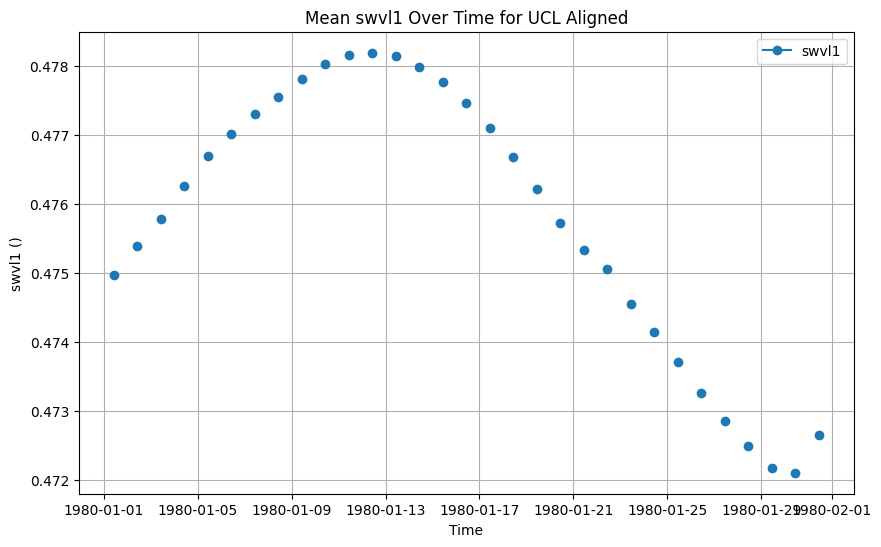

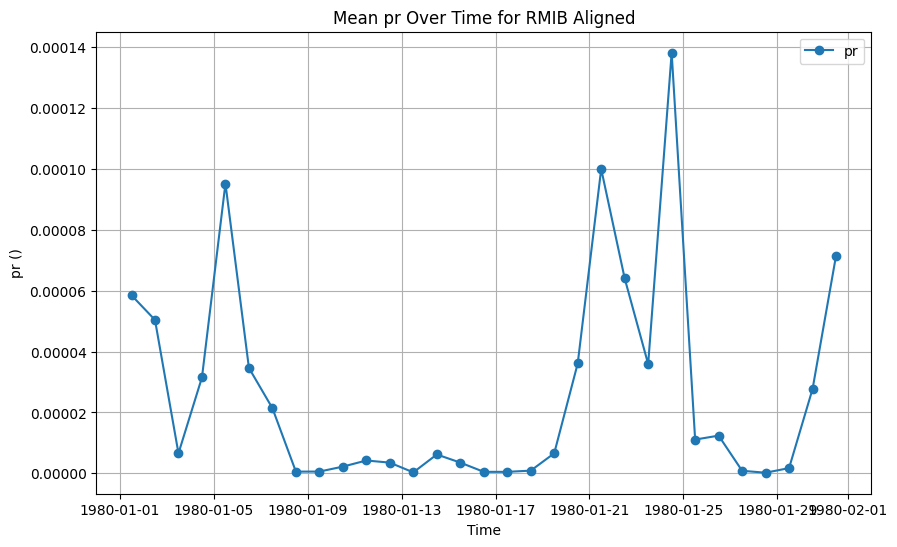

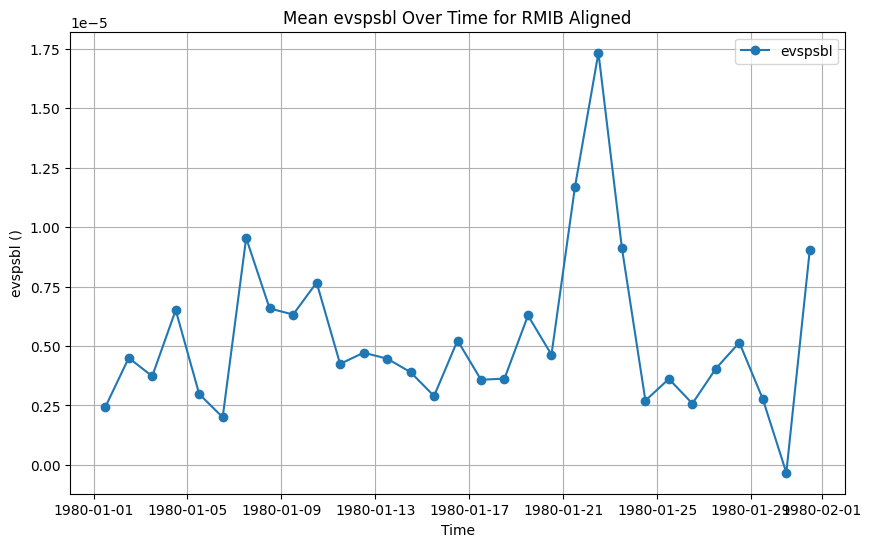

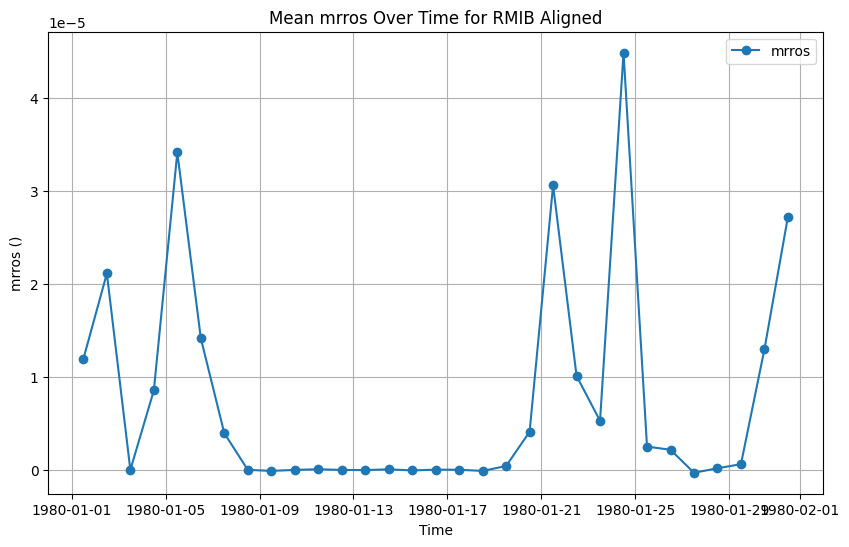

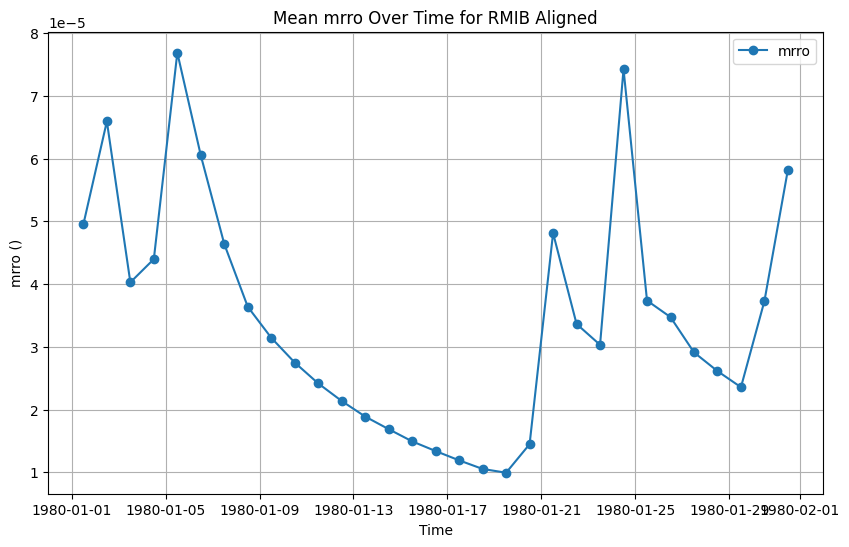

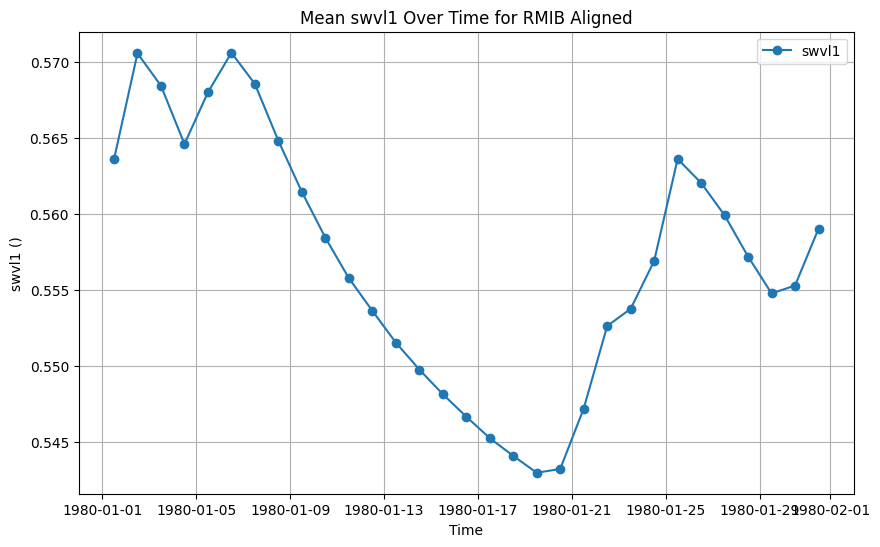

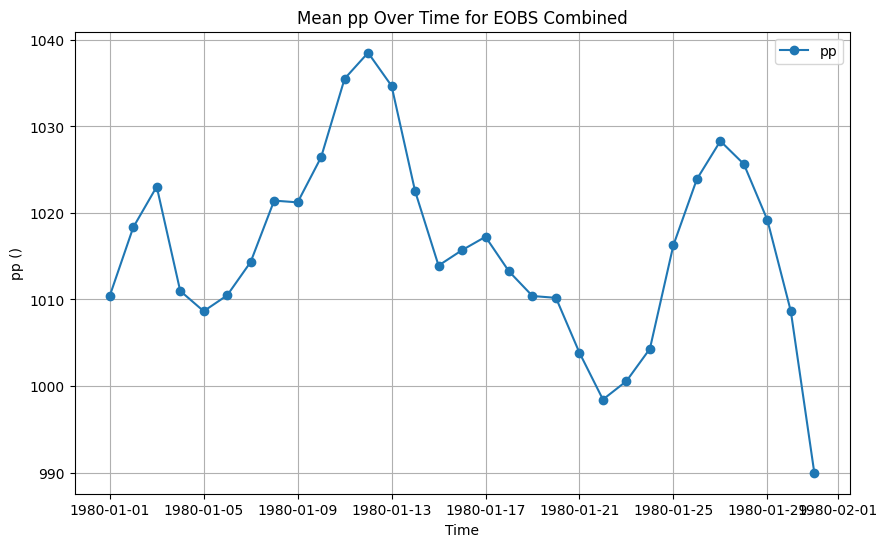

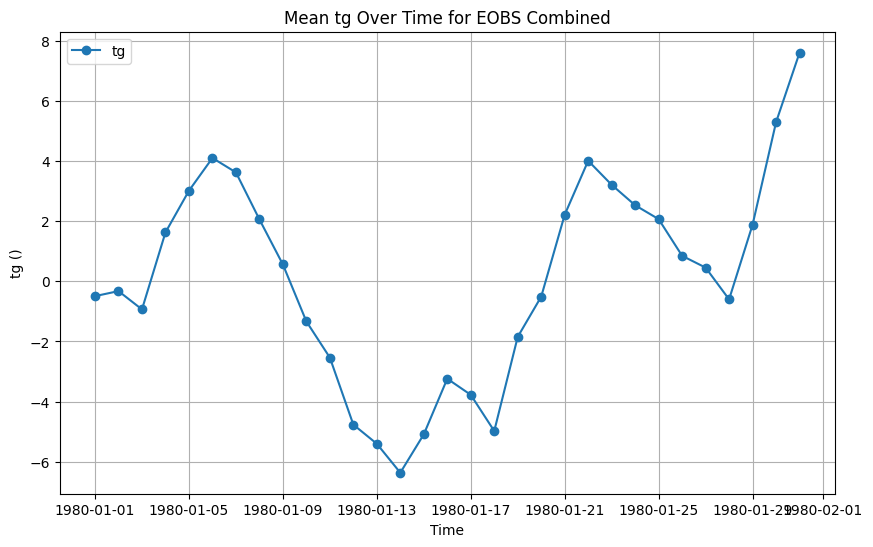

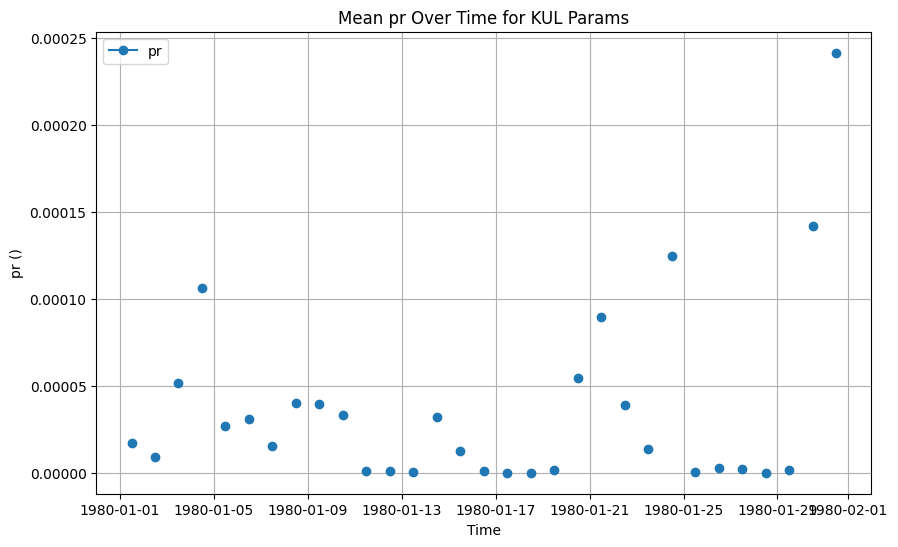

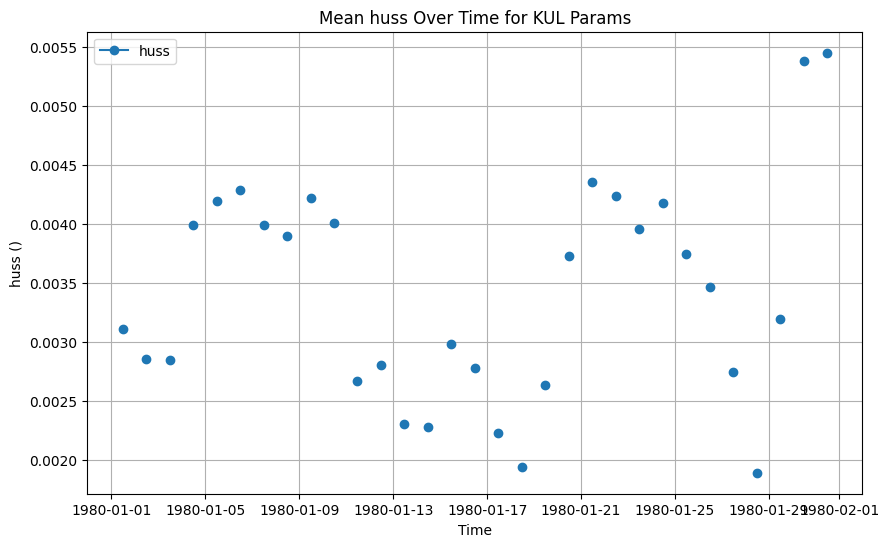

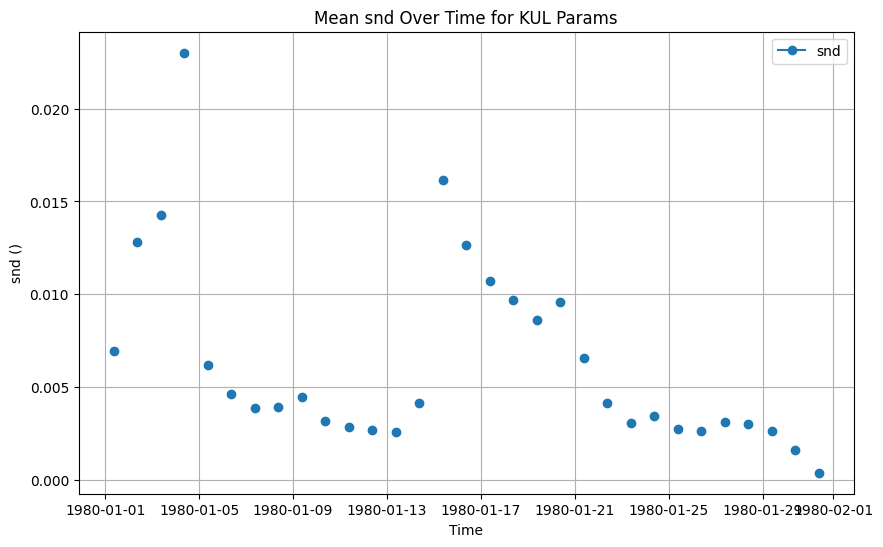

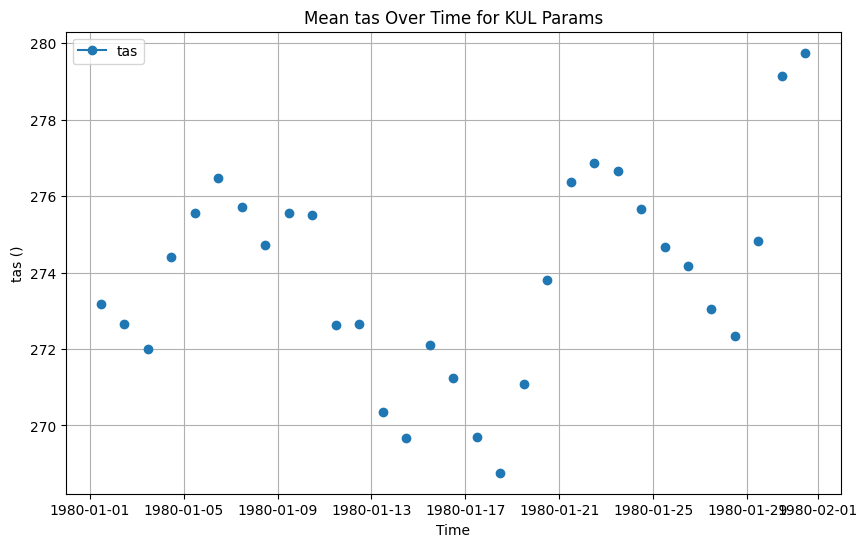

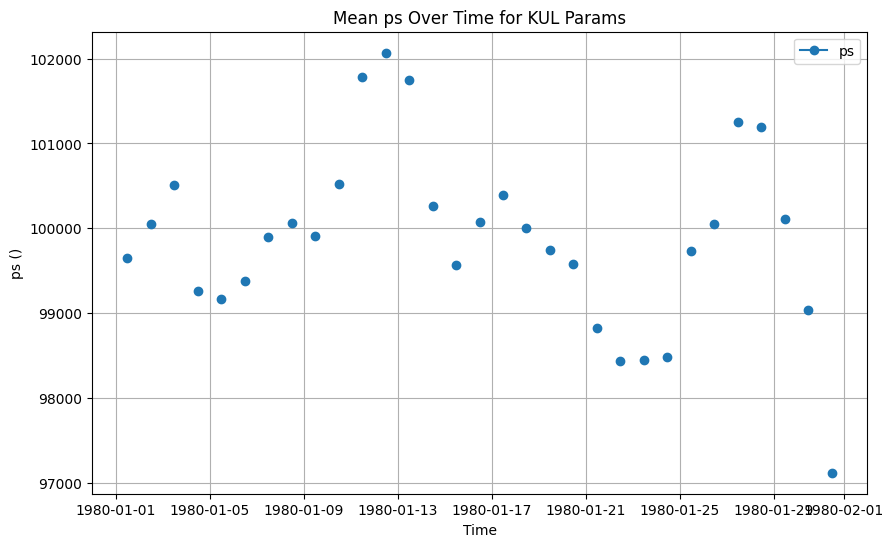

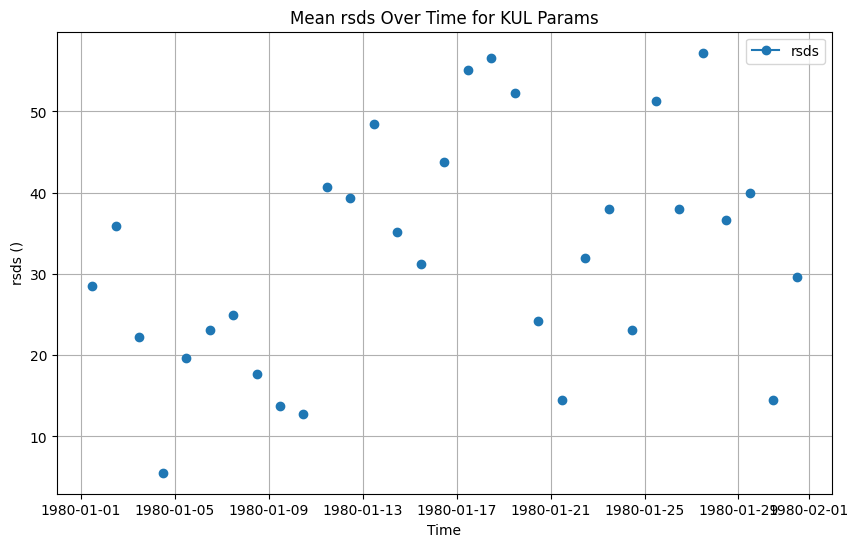

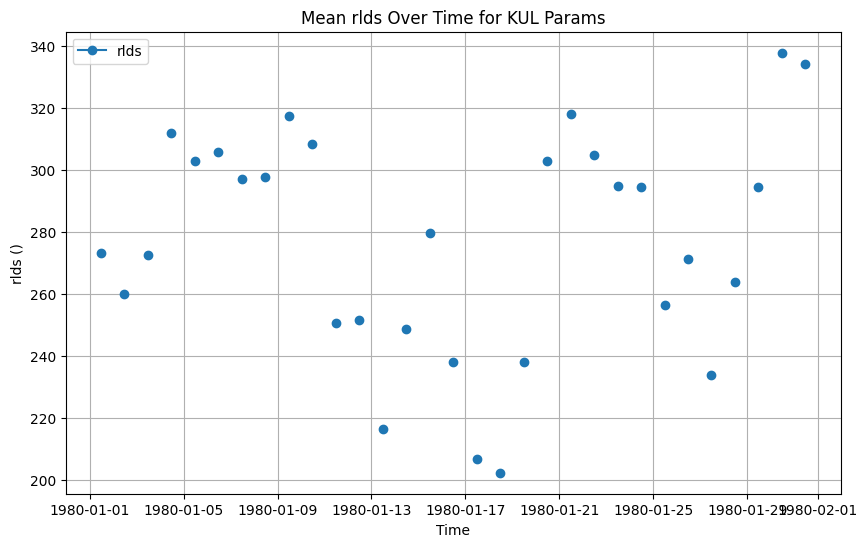

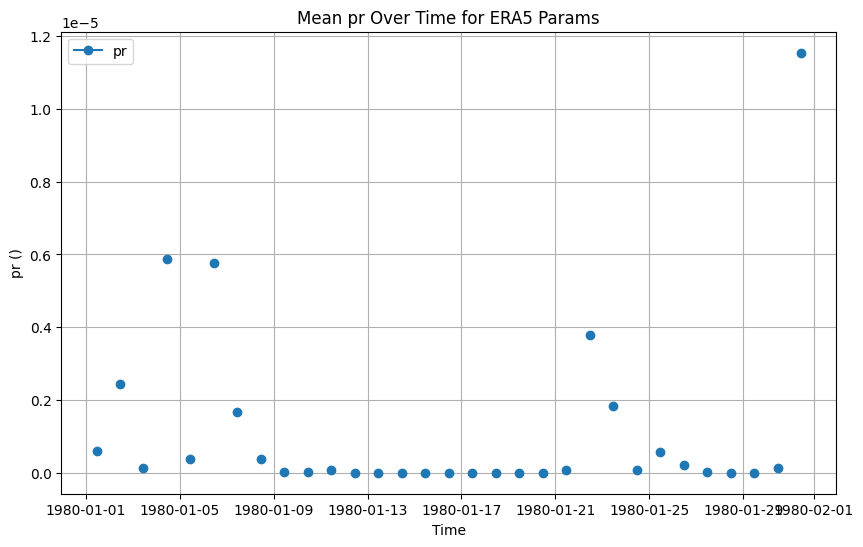

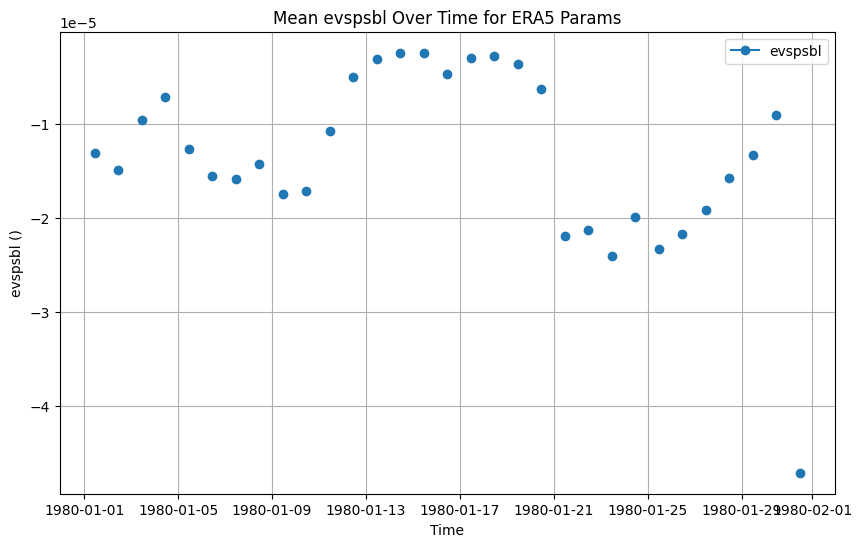

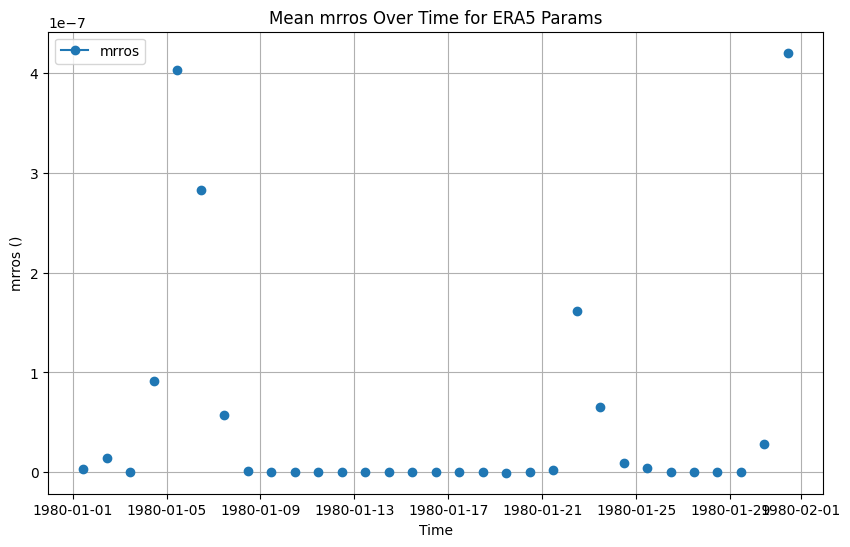

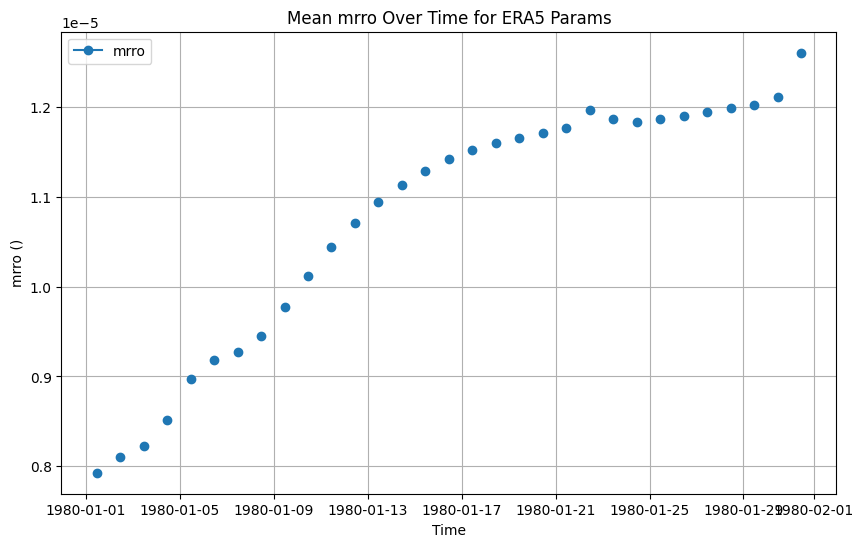

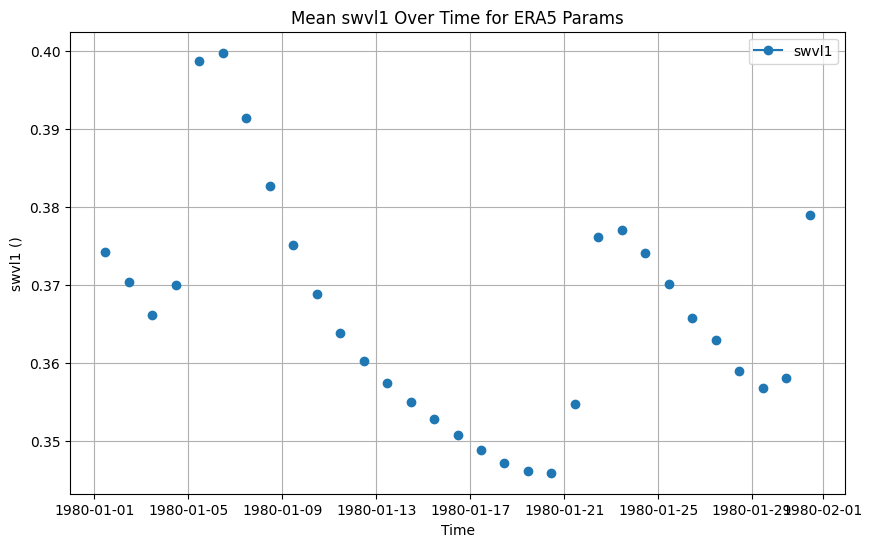

UCL Aligned - pr: 124 NaN values
UCL Aligned - evspsbl: 124 NaN values
UCL Aligned - mrros: 124 NaN values
UCL Aligned - mrro: 124 NaN values
UCL Aligned - swvl1: 124 NaN values
RMIB Aligned - pr: 0 NaN values
RMIB Aligned - evspsbl: 0 NaN values
RMIB Aligned - mrros: 0 NaN values
RMIB Aligned - mrro: 0 NaN values
RMIB Aligned - swvl1: 0 NaN values
EOBS Combined - pp: 0 NaN values
EOBS Combined - tg: 0 NaN values
KUL Params - pr: 62 NaN values
KUL Params - huss: 62 NaN values
KUL Params - snd: 62 NaN values
KUL Params - tas: 62 NaN values
KUL Params - ps: 62 NaN values
KUL Params - rsds: 62 NaN values
KUL Params - rlds: 62 NaN values
ERA5 Params - pr: 31 NaN values
ERA5 Params - evspsbl: 31 NaN values
ERA5 Params - mrros: 31 NaN values
ERA5 Params - mrro: 31 NaN values
ERA5 Params - swvl1: 31 NaN values


In [15]:
import xarray as xr
import matplotlib.pyplot as plt

# Function to plot mean values over time for January 1980
def plot_mean_values(datasets, variables, titles):
    # Define the time period
    time_slice = slice('1980-01-01', '1980-01-31')

    for dataset, var_set, title in zip(datasets, variables, titles):
        ds_jan = dataset.sel(time=time_slice)
        ds_jan = ds_jan.chunk({'time': -1})  # Rechunk along the time dimension
        
        for variable in var_set:
            if variable in ds_jan.variables:
                data = ds_jan[variable]
                if 'soil1' in data.dims:
                    data_mean = data.mean(dim=['soil1', 'lat', 'lon'], skipna=True)
                else:
                    data_mean = data.mean(dim=['lat', 'lon'], skipna=True)

                # Plot the data without interpolation
                plt.figure(figsize=(10, 6))
                plt.plot(data_mean.time, data_mean, 'o-', label=variable)
                plt.xlabel('Time')
                plt.ylabel(f'{variable} ({data_mean.attrs.get("units", "")})')
                plt.title(f'Mean {variable} Over Time for {title}')
                plt.legend()
                plt.grid(True)
                plt.show()


# Define the datasets and variables 
datasets = [ucl_aligned, rmib_aligned, eobs_combined_params, kul_params, era5_params]
variables = [
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pp', 'tg'],
    ['pr', 'huss', 'snd', 'tas', 'ps', 'rsds', 'rlds'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']
]
titles = ['UCL Aligned', 'RMIB Aligned', 'EOBS Combined', 'KUL Params', 'ERA5 Params']

plot_mean_values(datasets, variables, titles)

# Function to print all NaN values for each dataset and variable
def print_nan_values(datasets, variables, titles):
    time_slice = slice('1980-01-01', '1980-01-31')

    for dataset, var_set, title in zip(datasets, variables, titles):
        ds_jan = dataset.sel(time=time_slice)
        
        for variable in var_set:
            if variable in ds_jan.variables:
                data = ds_jan[variable]
                if 'soil1' in data.dims:
                    data_mean = data.mean(dim=['soil1', 'lat', 'lon'], skipna=True)
                else:
                    data_mean = data.mean(dim=['lat', 'lon'], skipna=True)

                nan_values = data_mean.isnull().sum().compute()
                print(f'{title} - {variable}: {nan_values.values} NaN values')


# Define the datasets and variables
datasets = [ucl_aligned, rmib_aligned, eobs_combined_params, kul_params, era5_params]
variables = [
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pp', 'tg'],
    ['pr', 'huss', 'snd', 'tas', 'ps', 'rsds', 'rlds'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']
]
titles = ['UCL Aligned', 'RMIB Aligned', 'EOBS Combined', 'KUL Params', 'ERA5 Params']

print_nan_values(datasets, variables, titles)

# Function to calculate bias between model data and reference data
def calculate_bias(model_data, ref_data):
    # Calculate time-averaged data
    model_mean = model_data.mean(dim='time', skipna=True)
    ref_mean = ref_data.mean(dim='time', skipna=True)
    
    # Calculate bias as the difference of means
    bias = model_mean - ref_mean
    return bias

# Example usage of calculate_bias (assuming model_data and ref_data are provided)
# bias = calculate_bias(model_data, ref_data)


In [19]:
# Function to check the specific time of day for measurements
def check_measurement_time(datasets, variables, titles):
    for dataset, var_set, title in zip(datasets, variables, titles):
        print(f"\nChecking measurement times for {title}:")
        
        for variable in var_set:
            if variable in dataset.variables:
                data = dataset[variable]
                
                # Extract the time component of the first few measurements
                times = pd.to_datetime(data.time.values).time[:5]
                
                print(f"{variable}: Measurement times: {times}")

# Define the datasets and variables for all datasets
datasets = [ucl_aligned, rmib_aligned, eobs_combined_params, kul_params, era5_params]
variables = [
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1'],
    ['pp', 'tg'],
    ['pr', 'huss', 'snd', 'tas', 'ps', 'rsds', 'rlds'],
    ['pr', 'evspsbl', 'mrros', 'mrro', 'swvl1']
]
titles = ['UCL Aligned', 'RMIB Aligned', 'EOBS Combined', 'KUL Params', 'ERA5 Params']

check_measurement_time(datasets, variables, titles)



Checking measurement times for UCL Aligned:
pr: Measurement times: [datetime.time(0, 0) datetime.time(9, 0) datetime.time(10, 30)
 datetime.time(11, 30) datetime.time(11, 52, 30)]
evspsbl: Measurement times: [datetime.time(0, 0) datetime.time(9, 0) datetime.time(10, 30)
 datetime.time(11, 30) datetime.time(11, 52, 30)]
mrros: Measurement times: [datetime.time(0, 0) datetime.time(9, 0) datetime.time(10, 30)
 datetime.time(11, 30) datetime.time(11, 52, 30)]
mrro: Measurement times: [datetime.time(0, 0) datetime.time(9, 0) datetime.time(10, 30)
 datetime.time(11, 30) datetime.time(11, 52, 30)]
swvl1: Measurement times: [datetime.time(0, 0) datetime.time(9, 0) datetime.time(10, 30)
 datetime.time(11, 30) datetime.time(11, 52, 30)]

Checking measurement times for RMIB Aligned:
pr: Measurement times: [datetime.time(12, 0) datetime.time(12, 0) datetime.time(12, 0)
 datetime.time(12, 0) datetime.time(12, 0)]
evspsbl: Measurement times: [datetime.time(12, 0) datetime.time(12, 0) datetime.time(

Conclusion about different amount of measurements over time

Below was what I was given as a start

## Load in the CORDEX.be I data


In [3]:
import valenspy.cf_checks
print(dir(valenspy.cf_checks))


['CORDEX_VARIABLES', 'List', 'MAIN_METADATA', 'Path', 'Union', 'VARIABLE_METADATA', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_check_file_extension', '_check_main_metadata', '_check_variable_by_name', '_check_variable_metadata', 'file', 'files', 'is_cf_compliant', 'safe_load', 'xr']


In [6]:
import valenspy
valenspy.__file__


'/mnt/HDS_CORDEXBE_RMIB/kvandela/ValEnsPy/src/valenspy/__init__.py'

In [3]:
files= list(Path("/mnt/HDS_CORDEXBE_HUB/CORDEXBE_HUB/ALARO-0_RMIB-UGent/ncdf_GeertLenderink/ERAINT_1980_2010/").rglob("*.nc"))
alaro_ds = xr.open_mfdataset(files, chunks="auto")
alaro_ds

<xarray.Dataset> Size: 2TB
Dimensions:            (x: 485, y: 485, time: 543504, bnds: 2)
Coordinates:
  * x                  (x) float64 4kB 0.0 12.5 25.0 ... 6.038e+03 6.05e+03
  * y                  (y) float64 4kB 0.0 12.5 25.0 ... 6.038e+03 6.05e+03
  * time               (time) datetime64[ns] 4MB 1980-01-01 ... 2010-12-31T23...
    lon                (y, x) float64 2MB dask.array<chunksize=(485, 485), meta=np.ndarray>
    lat                (y, x) float64 2MB dask.array<chunksize=(485, 485), meta=np.ndarray>
    height             float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    huss               (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
    Lambert_Conformal  (time) object 4MB b'' b'' b'' b'' b'' ... b'' b'' b'' b''
    pr                 (time, y, x) float32 511GB dask.array<chunksize=(285, 485, 485), meta=np.ndarray>
    time_bnds          (time, bnds) datetime64[ns] 9MB dask.array<chunksize=(17569, 2), meta=np.ndarray>
    ps                 (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
    tas                (time, y, x) float32 511GB dask.array<chunksize=(284, 485, 485), meta=np.ndarray>
Attributes: (12/24)
    institute_id:                   RMIB-UGent
    model_id:                       RMIB-UGent-ALARO-0
    experiment_id:                  evaluation
    product:                        output
    Conventions:                    CF-1.6
    driving_model_id:               ECMWF-ERAINT
    ...                             ...
    endtime:                        347151600.0
    frequency:                      1hr
    creation_date:                  2019-01-30T21:07:50Z
    tracking_id:                    fce1ee51-5cab-4ff6-8bc5-ffca160ea1c3
    driving_experiment:             ECMWF-ERAINT, evaluation, r1i1p1
    history:                        Created by CordextractR v1.9-84-g0054a8f

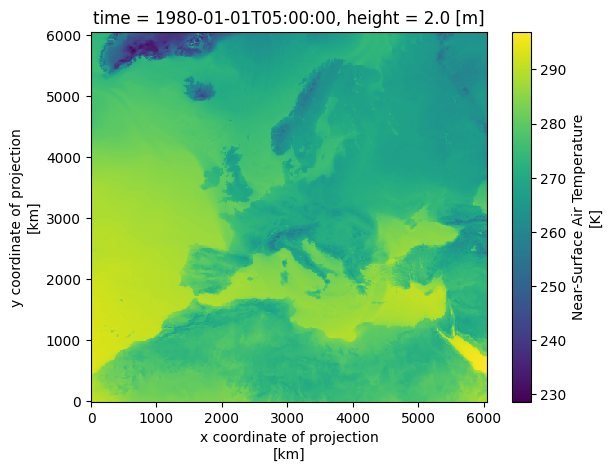

In [4]:
alaro_ds.tas.isel(time=10).plot()

# Load in the Observational data

In [5]:
ds = xr.open_mfdataset("/mnt/HDS_FORESTFLOW/FORESTFLOW/CLIMATE_GRID/SYLVAIN/Daily*.nc", chunks="auto")
ds

<xarray.Dataset> Size: 4GB
Dimensions:          (time: 24837, lat: 64, lon: 73)
Coordinates:
  * lon              (lon) float64 584B 2.45 2.508 2.565 ... 6.485 6.542 6.6
  * lat              (lat) float64 512B 49.35 49.39 49.42 ... 51.58 51.61 51.65
  * time             (time) datetime64[ns] 199kB 1954-01-01 ... 2021-12-31
Data variables:
    PRECIP_QUANTITY  (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_AVG         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_MAX         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
    TEMP_MIN         (time, lat, lon) float64 928MB dask.array<chunksize=(365, 64, 73), meta=np.ndarray>
Attributes:
    Creators:                     Ghilain N., Van Schaeybroeck B., Marchi S.
    Version:                      1.1
    Affiliation:                  Royal Meteorological Institute of Belgium
    Url:                          https://opendata.meteo.be/geonetwork/srv/en...
    Coordinate reference system:  EPSG:4258
    Identifier:                   RMI_DATASET_GRIDDEDOBS

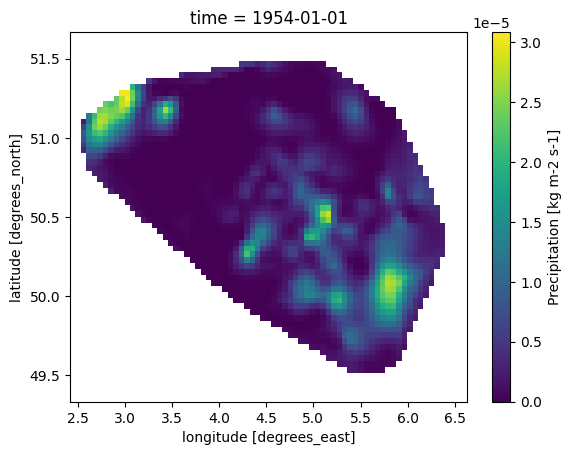

In [6]:
#plot the first time step for Precipitation
ds.PRECIP_QUANTITY.isel(time=0).plot()